# Curso de Manejo de Datos Faltantes: Detección y Exploración

[![Curso creado por jvelezmagic](https://img.shields.io/badge/Desarrollado%20por-%40jvelezmagic-blue?&style=for-the-badge&logo=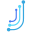)](https://jvelezmagic.com/)

![Curso de Exploración de Valores Faltantes para Data Science](logo-curso.jpeg)

## Configuración de ambiente de trabajo

```bash
pip install --upgrade pip
```

```bash
pip install pyjanitor matplotlib==3.5.1 missingno numpy pandas pyreadr seaborn session-info upsetplot==0.6.1
```

or 

```bash
pip install -r requirements.txt
```

## Importar librerías

In [5]:
import janitor
import matplotlib.pyplot as plt
import missingno
import numpy as np
import pandas as pd
import pyreadr
import seaborn as sns
import session_info
import upsetplot

/home/cristian/.local/lib/python3.10/site-packages/upsetplot/data.py:4: DeprecationWarning: The distutils package is deprecated and slated for removal in Python 3.12. Use setuptools or check PEP 632 for potential alternatives
  from distutils.version import LooseVersion


## Importar funciones personalizadas

In [42]:
#Esta funcion me conecta con el archivo .py que extiende las funcionalidades de pandas
%run pandas_missing_extension.py

## Configurar el aspecto general de las gráficas del proyecto

In [2]:
%matplotlib inline

sns.set(
    rc={
        "figure.figsize": (10, 10)
    }
)

sns.set_style("whitegrid")

## Operar con valores faltantes

### Python

In [4]:
print(
    None or True, #Prioriza el True
    None or False, #Prioriza el false
    None == None, #Devuelve True
    None is None, #Devuelve True
    # None + True,
    # None / False,
    type(None),
    sep="\n"
)

True
False
True
True
<class 'NoneType'>


### NumPy

In [5]:
print(
    np.nan or True, #Prioriza el nan
    np.nan or False, #Prioriza el nan
    np.nan == np.nan, #Retorna False
    np.nan is np.nan, #Retorna True
    np.nan / 2, #retorna nan
    np.nan * 7, #Retorna nan
    type(np.nan), 
    np.isnan(np.nan), #Retorna True
    sep="\n"
)

nan
nan
False
True
nan
nan
<class 'float'>
True


### Pandas

In [6]:
#Creacion del df partiendo de diccionario
test_missing_df = pd.DataFrame.from_dict(
    data=dict(
        x=[0, 1, np.nan, np.nan, None],
        y=[0, 1, pd.NA, np.nan, None]
    )
)

test_missing_df

,x,y
0,0.0,0
1,1.0,1
2,NaN,<NA>
3,NaN,NaN
4,NaN,None


In [7]:
#Tanto .isna como .isnull devuelven valores True o False
test_missing_df.isna()


,x,y
0,False,False
1,False,False
2,True,True
3,True,True
4,True,True


In [8]:
#Tanto .isna como .isnull devuelven valores True o False
test_missing_df.isnull()

,x,y
0,False,False
1,False,False
2,True,True
3,True,True
4,True,True


## Cargar los conjuntos de datos

### Pima Indians Diabetes

In [2]:
#URL de CSV
pima_indians_diabetes_url = "https://nrvis.com/data/mldata/pima-indians-diabetes.csv"

In [3]:
#Descargo el CSV
import urllib.request

filename = "./data/pima-indians-diabetes.csv" #Ruta + nombre donde se guardara el CSV
urllib.request.urlretrieve(pima_indians_diabetes_url, filename)

('./data/pima-indians-diabetes.csv',
 <http.client.HTTPMessage at 0x7f19fffe3a00>)

In [6]:
#Le pongo nombres a las columnas del CSV
diabetes_df = pd.read_csv(
    filepath_or_buffer=filename, # Ubicacion del CSV
    sep=",",
    names=[
        "pregnancies",
        "glucose",
        "blood_pressure",
        "skin_thickness",
        "insulin",
        "bmi",
        "diabetes_pedigree_function",
        "age",
        "outcome",
    ]
)

### naniar (oceanbuoys, pedestrian, riskfactors)

#### Crear unidades de información de los conjuntos de datos

#### Descargar y cargar los conjuntos de datos

In [7]:
#Descargar y leer archivos de R
archivos = ['oceanbuoys.rda', 'riskfactors.rda', 'pedestrian.rda']
for archivo in archivos:
    #Url donde se ubica cada archivo
    url = f"https://github.com/njtierney/naniar/raw/master/data/{archivo}"
    #Directorio local donde se almacena cada archivo
    urllib.request.urlretrieve(url, f'./data/{archivo}')


### Verificar carga

In [9]:
#Se obtienen los archivos .rda en formato dataframe
oceanbuoys_df = pyreadr.read_r('data/oceanbuoys.rda').get('oceanbuoys')
riskfactors_df = pyreadr.read_r('data/riskfactors.rda').get('riskfactors')
pedestrian_df = pyreadr.read_r('data/pedestrian.rda').get('pedestrian')

In [10]:
#Se comprueba que la carga de datos de los dataframes se realizo con exito
longitud_dfs = [oceanbuoys_df.shape, riskfactors_df.shape, pedestrian_df.shape] 
longitud_dfs

[(736, 8), (245, 34), (37700, 9)]

## Tabulación de valores faltantes

In [11]:
#Valores faltantes por columna
riskfactors_df.isna()

,state,sex,age,weight_lbs,height_inch,bmi,marital,pregnant,children,education,...,smoke_100,smoke_days,smoke_stop,smoke_last,diet_fruit,diet_salad,diet_potato,diet_carrot,diet_vegetable,diet_juice
0,False,False,False,False,False,False,False,True,False,False,...,False,True,True,True,False,False,False,False,False,False
1,False,False,False,False,False,False,False,True,False,False,...,False,True,True,True,False,False,False,False,False,False
2,False,False,False,False,False,False,False,True,False,False,...,False,True,True,True,False,False,False,False,False,False
3,False,False,False,False,False,False,False,True,False,False,...,False,True,True,True,True,True,True,True,True,True
4,False,False,False,False,False,False,False,True,False,False,...,False,False,False,True,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
240,False,False,False,False,False,False,False,True,False,False,...,False,True,True,True,False,False,False,False,False,False
241,False,False,False,False,False,False,False,True,False,False,...,False,True,True,True,False,False,False,False,False,False
242,False,False,False,False,False,False,False,True,False,False,...,False,False,True,False,False,False,False,False,False,False
243,False,False,False,False,False,False,False,True,False,False,...,False,False,False,True,False,False,False,False,False,False


### Resúmenes básicos de valores faltantes

In [17]:
#Numero de valores completos
riskfactors_df.missing.number_complete()

7144

In [18]:
#Numero de valores faltantes
riskfactors_df.missing.number_missing()

1186

In [19]:
#Numero de valores faltantes, numeros de valores y porcentaje de faltantes por fila
riskfactors_df.missing.missing_variable_summary()

,variable,n_missing,n_cases,pct_missing
0,state,0,245,0.000000
1,sex,0,245,0.000000
2,age,0,245,0.000000
3,weight_lbs,10,245,4.081633
4,height_inch,2,245,0.816327
5,bmi,11,245,4.489796
6,marital,1,245,0.408163
7,pregnant,215,245,87.755102
8,children,0,245,0.000000
9,education,1,245,0.408163


In [43]:
riskfactors_df.missing.missing_variable_table()


AttributeError: 'DataFrame' object has no attribute 'n_variables'

In [21]:
#numero y porcentaje de valores perdidos por fila 
riskfactors_df.missing.missing_case_summary()

,case,n_missing,pct_missing
0,0,6,16.666667
1,1,6,16.666667
2,2,7,19.444444
3,3,12,33.333333
4,4,5,13.888889
...,...,...,...
240,240,6,16.666667
241,241,5,13.888889
242,242,3,8.333333
243,243,2,5.555556


In [44]:
riskfactors_df.missing.missing_case_table()

AttributeError: 'DataFrame' object has no attribute 'n_cases'

In [45]:
(#muestra el porcentaje de valores faltantes en la variable "weight_lbs" para cada intervalo
    riskfactors_df
    .missing
    .missing_variable_span(
        variable="weight_lbs", #columna  del dataframe a analizar 
        span_every=50 #intervalo de filas igual a 50
    )
)

,span_counter,n_missing,n_complete,pct_missing,pct_complete
0,0,1,49,2.000000,98.000000
1,1,5,45,10.000000,90.000000
2,2,1,49,2.000000,98.000000
3,3,1,49,2.000000,98.000000
4,4,2,43,4.444444,95.555556


In [46]:
(# muestra la longitud de cada secuencia de valores nulos y no nulos en la variable "weight_lbs"
    riskfactors_df
    .missing
    .missing_variable_run(
        variable="weight_lbs"#columna  del dataframe a analizar 
    )
)

,run_length,is_na
0,14,complete
1,1,missing
2,45,complete
3,1,missing
4,5,complete
5,1,missing
6,12,complete
7,1,missing
8,10,complete
9,2,missing


In [12]:
riskfactors_df.isna().any()

state               False
sex                 False
age                 False
weight_lbs           True
height_inch          True
bmi                  True
marital              True
pregnant             True
children            False
education            True
employment          False
income              False
veteran              True
hispanic             True
health_general      False
health_physical     False
health_mental       False
health_poor          True
health_cover        False
provide_care         True
activity_limited     True
drink_any            True
drink_days           True
drink_average        True
smoke_100            True
smoke_days           True
smoke_stop           True
smoke_last           True
diet_fruit           True
diet_salad           True
diet_potato          True
diet_carrot          True
diet_vegetable       True
diet_juice           True
dtype: bool

In [13]:
riskfactors_df.isna().count()

state               245
sex                 245
age                 245
weight_lbs          245
height_inch         245
bmi                 245
marital             245
pregnant            245
children            245
education           245
employment          245
income              245
veteran             245
hispanic            245
health_general      245
health_physical     245
health_mental       245
health_poor         245
health_cover        245
provide_care        245
activity_limited    245
drink_any           245
drink_days          245
drink_average       245
smoke_100           245
smoke_days          245
smoke_stop          245
smoke_last          245
diet_fruit          245
diet_salad          245
diet_potato         245
diet_carrot         245
diet_vegetable      245
diet_juice          245
dtype: int64

In [15]:
riskfactors_df.size, riskfactors_df.shape

(8330, (245, 34))

#### Número total de valores completos (sin observaciones faltantes)

In [24]:
riskfactors_df.missing.number_complete()

7144

In [16]:
riskfactors_df.size - riskfactors_df.isnull().sum().sum()

7144

#### Número total de valores faltantes

In [22]:
riskfactors_df.isnull().sum().sum()

1186

### Resúmenes tabulares de valores faltantes

#### Variables / Columnas

##### Resumen por variable

In [25]:
#Por cada columna me muestra el el numero de fila y numero y porcentaje de valores perdidos.
riskfactors_df.missing.missing_variable_summary()


,variable,n_missing,n_cases,pct_missing
0,state,0,245,0.000000
1,sex,0,245,0.000000
2,age,0,245,0.000000
3,weight_lbs,10,245,4.081633
4,height_inch,2,245,0.816327
5,bmi,11,245,4.489796
6,marital,1,245,0.408163
7,pregnant,215,245,87.755102
8,children,0,245,0.000000
9,education,1,245,0.408163


In [101]:
import missingno

In [26]:
riskfactors_df.missing.missing_variable_table()

AttributeError: 'DataFrame' object has no attribute 'n_variables'

In [109]:
#muestra el numero de valores completos por columna y su tipo de dato
riskfactors_df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 245 entries, 0 to 244
Data columns (total 34 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   state             245 non-null    category
 1   sex               245 non-null    category
 2   age               245 non-null    int32   
 3   weight_lbs        235 non-null    object  
 4   height_inch       243 non-null    object  
 5   bmi               234 non-null    float64 
 6   marital           244 non-null    category
 7   pregnant          30 non-null     category
 8   children          245 non-null    int32   
 9   education         244 non-null    category
 10  employment        245 non-null    category
 11  income            245 non-null    category
 12  veteran           242 non-null    category
 13  hispanic          243 non-null    category
 14  health_general    245 non-null    category
 15  health_physical   245 non-null    int32   
 16  health_mental     245 non-

<AxesSubplot:>

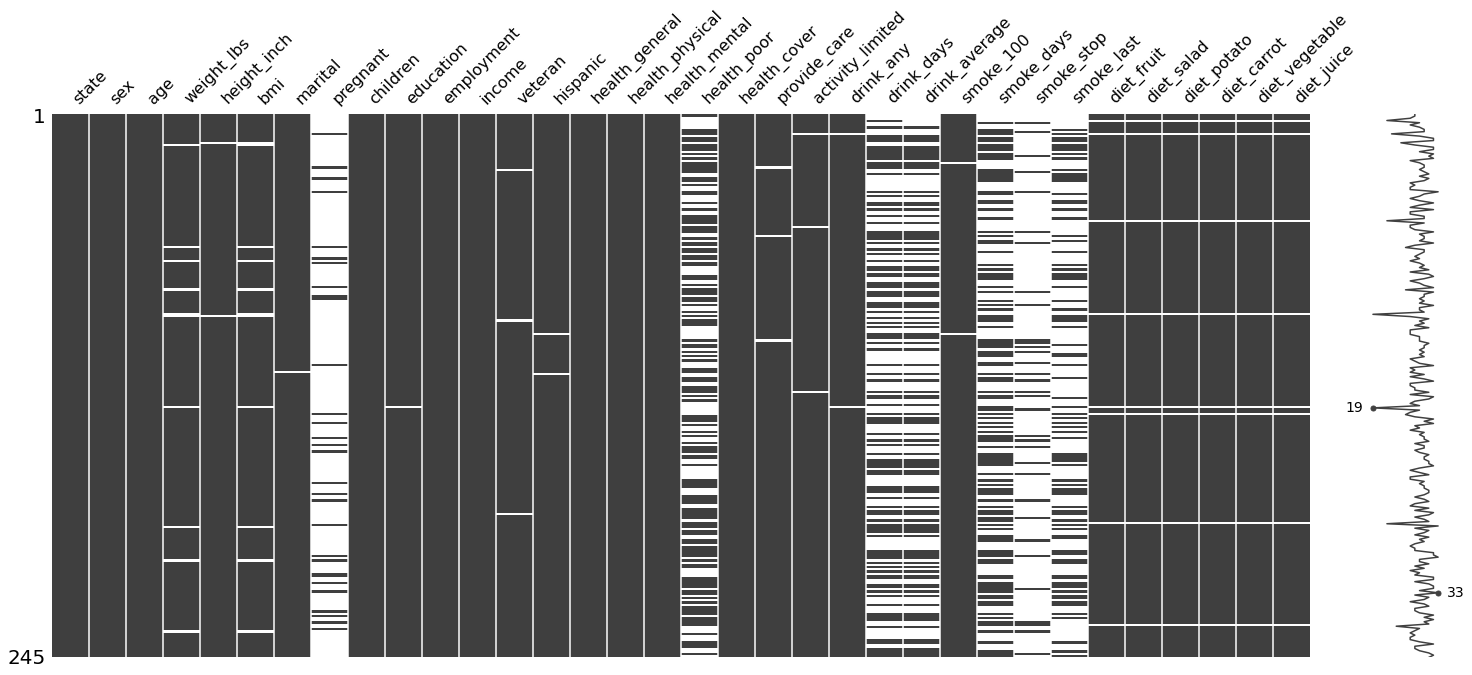

In [111]:
missingno.matrix(riskfactors_df)

<AxesSubplot:>

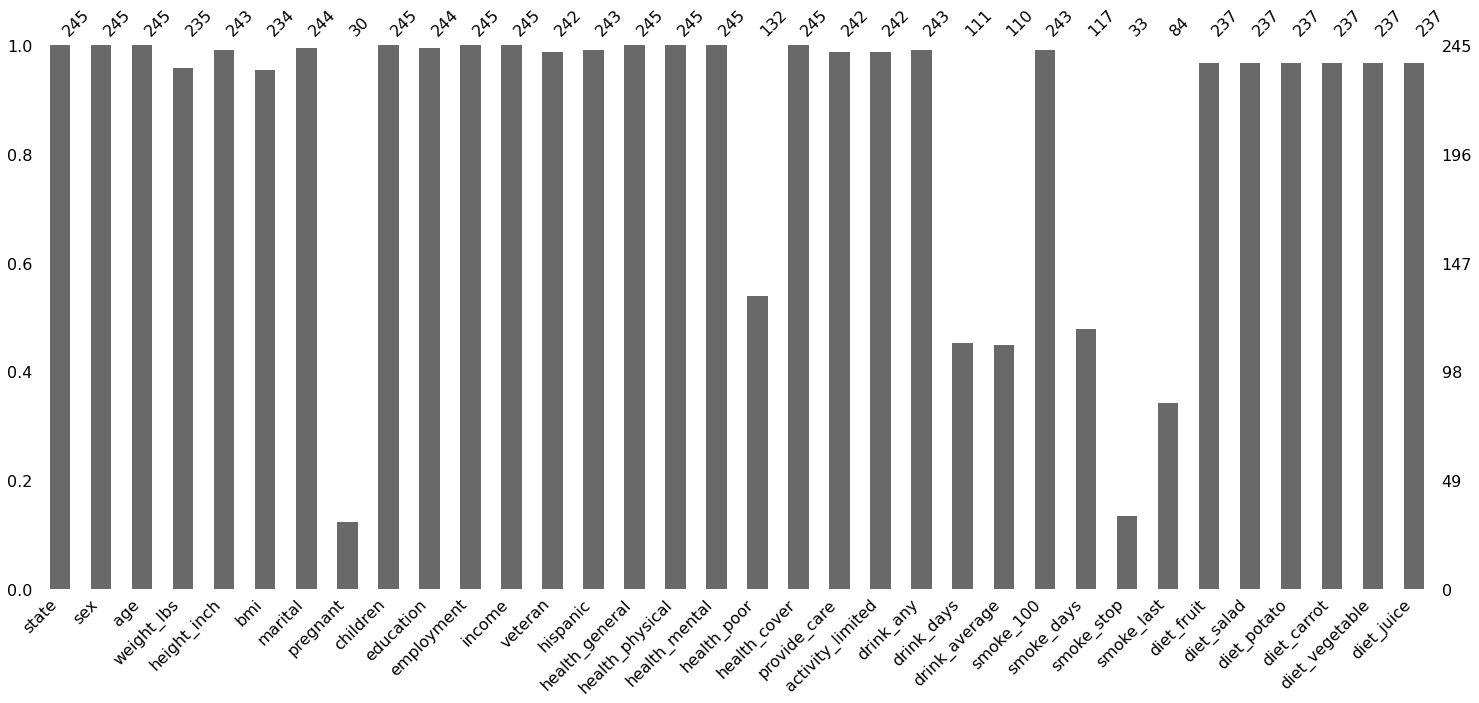

In [7]:
missingno.bar(riskfactors_df)

In [8]:
#Se crea dataframe para mostrar nulos, registros y porcentaje de relacion entre los dosriskfactors_df_pnulos
riskfactors_df_pnulos = pd.DataFrame([])

In [69]:
riskfactors_df_pnulos['Registros'] = riskfactors_df.count(axis=0).values

In [72]:
riskfactors_df_pnulos['Nulos'] = riskfactors_df.isnull().sum().values

###### Tabulación del resumen por variable

In [73]:
riskfactors_df_pnulos['Porcentaje'] = riskfactors_df_pnulos['Nulos'] * 100 / riskfactors_df_pnulos['Registros']

In [89]:
#Se filtran solo quellos registros con porcentaje de vacioos superior al 50%
riskfactors_df_pnulos = riskfactors_df_pnulos[riskfactors_df_pnulos.Porcentaje > 50]

<AxesSubplot:xlabel='Porcentaje'>

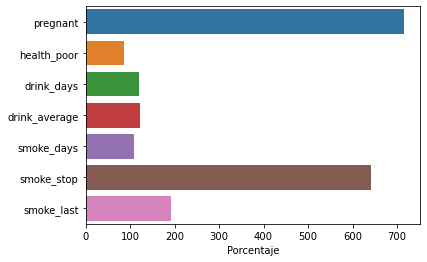

In [92]:
sns.barplot(data = riskfactors_df_pnulos, y=riskfactors_df_pnulos.index, x = 'Porcentaje')

#### Casos / Observaciones / Filas

##### Resúmenes por caso

###### Tabulación del resumen por caso

In [27]:
#numero de fila y numero y porcentaje de valores faltantes
riskfactors_df.missing.missing_case_summary()

,case,n_missing,pct_missing
0,0,6,16.666667
1,1,6,16.666667
2,2,7,19.444444
3,3,12,33.333333
4,4,5,13.888889
...,...,...,...
240,240,6,16.666667
241,241,5,13.888889
242,242,3,8.333333
243,243,2,5.555556


In [28]:
riskfactors_df.missing.missing_case_table()

AttributeError: 'DataFrame' object has no attribute 'n_cases'

### Intervalos de valores faltantes

In [29]:
(#muestra numero de intervalo, numero de valores faltantes por intervalo, numero de valores completospor intervalo, porcentaje de valores faltangtes por intervalo y
 #porcentaje de valores completos por intervalo
    riskfactors_df
    .missing
    .missing_variable_span(
        variable="weight_lbs",#columna sobre la que se realiza el analisis
        span_every=50 #intervlo de analisis
    )
)

,span_counter,n_missing,n_complete,pct_missing,pct_complete
0,0,1,49,2.000000,98.000000
1,1,5,45,10.000000,90.000000
2,2,1,49,2.000000,98.000000
3,3,1,49,2.000000,98.000000
4,4,2,43,4.444444,95.555556


### _Run length_ de valores faltantes

In [30]:
(
    riskfactors_df
    .missing
    .missing_variable_run(
        variable="weight_lbs"
    )
)

,run_length,is_na
0,14,complete
1,1,missing
2,45,complete
3,1,missing
4,5,complete
5,1,missing
6,12,complete
7,1,missing
8,10,complete
9,2,missing


## Visualización inicial de valores faltantes

### Variable

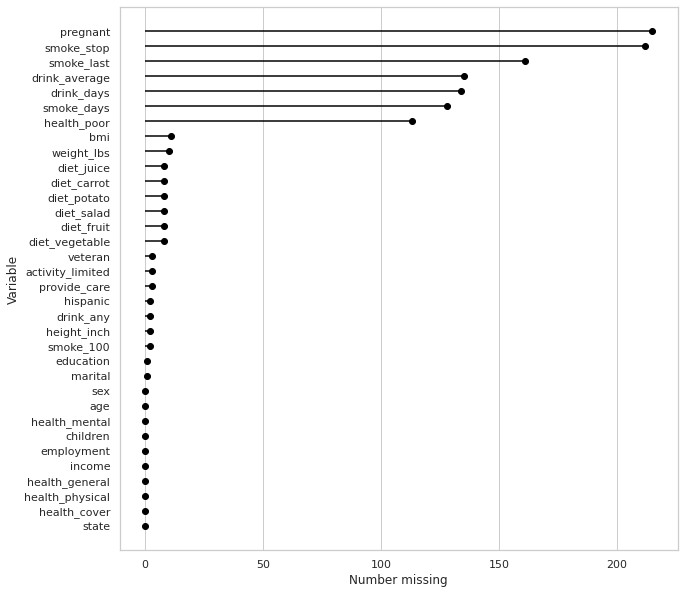

In [31]:
riskfactors_df.missing.missing_variable_plot()

### Casos / Observaciones / Filas

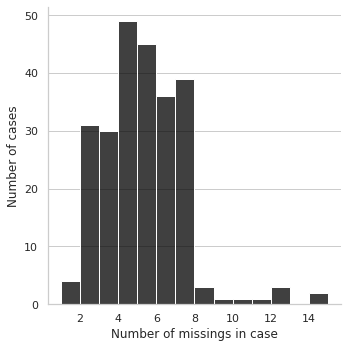

In [32]:
riskfactors_df.missing.missing_case_plot()

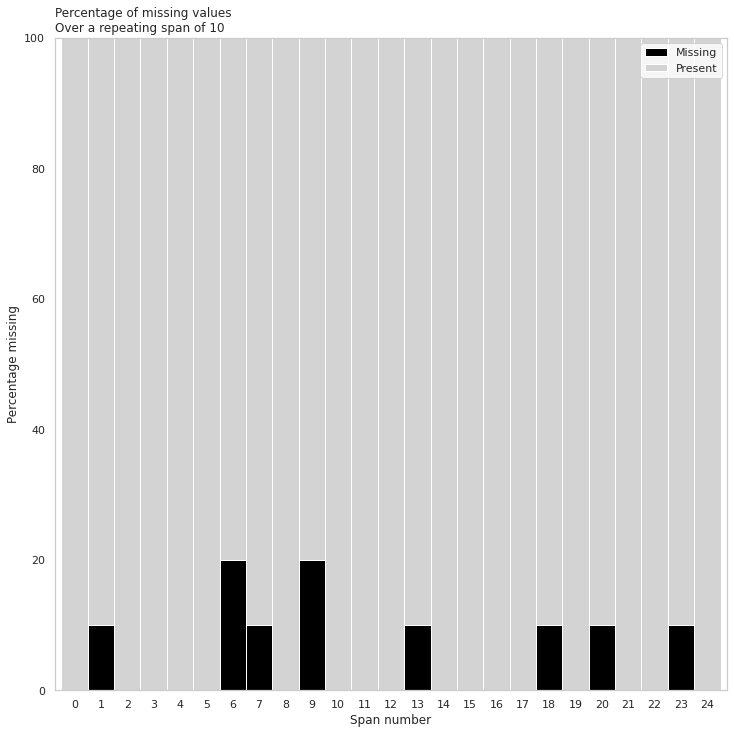

In [33]:
(#retorna porcentaje de valores perdidos por intervalo
    riskfactors_df
    .missing
    .missing_variable_span_plot(
        variable="weight_lbs",#columna del df
        span_every=10,#intervalo
        rot=0
    )
)

<AxesSubplot:>

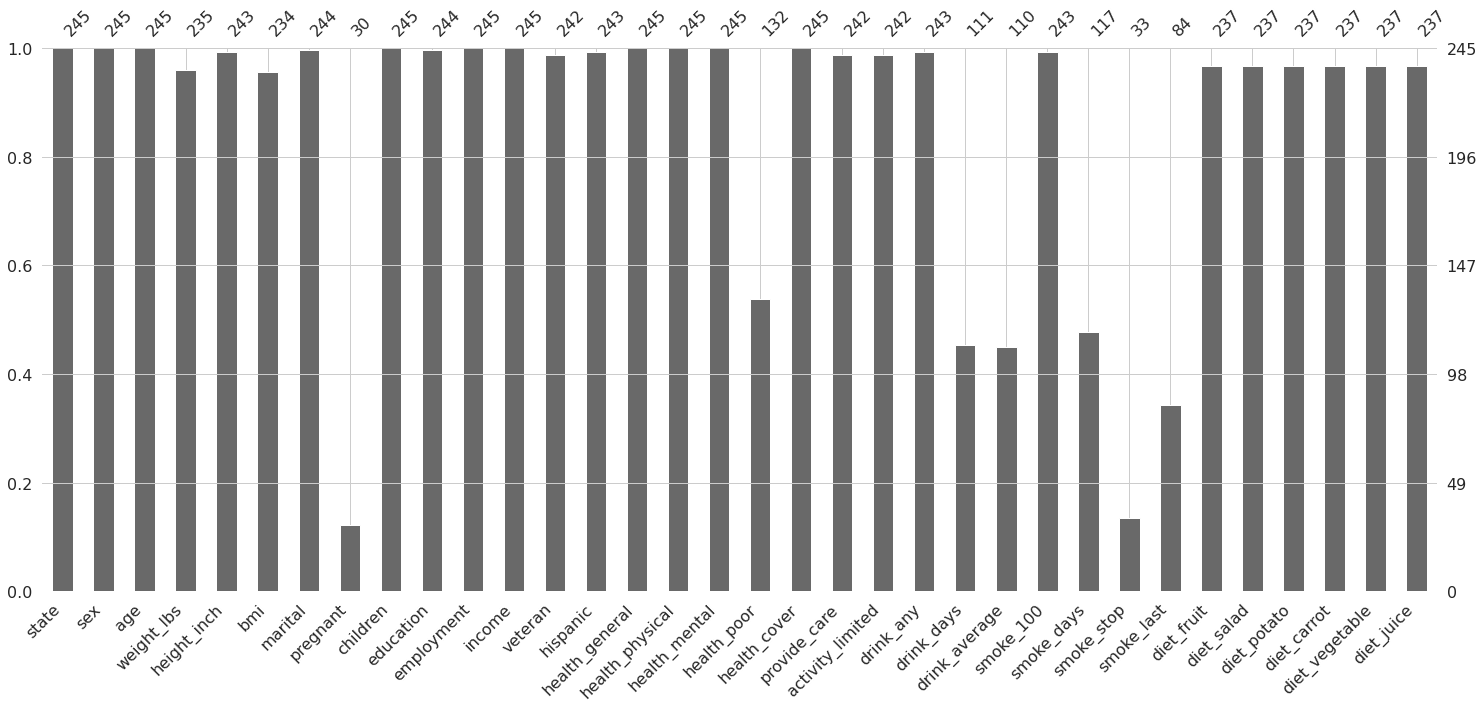

In [34]:
#grafico de barras que ilustra la cantidad de datos completos por columna
missingno.bar(df = riskfactors_df)

<AxesSubplot:>

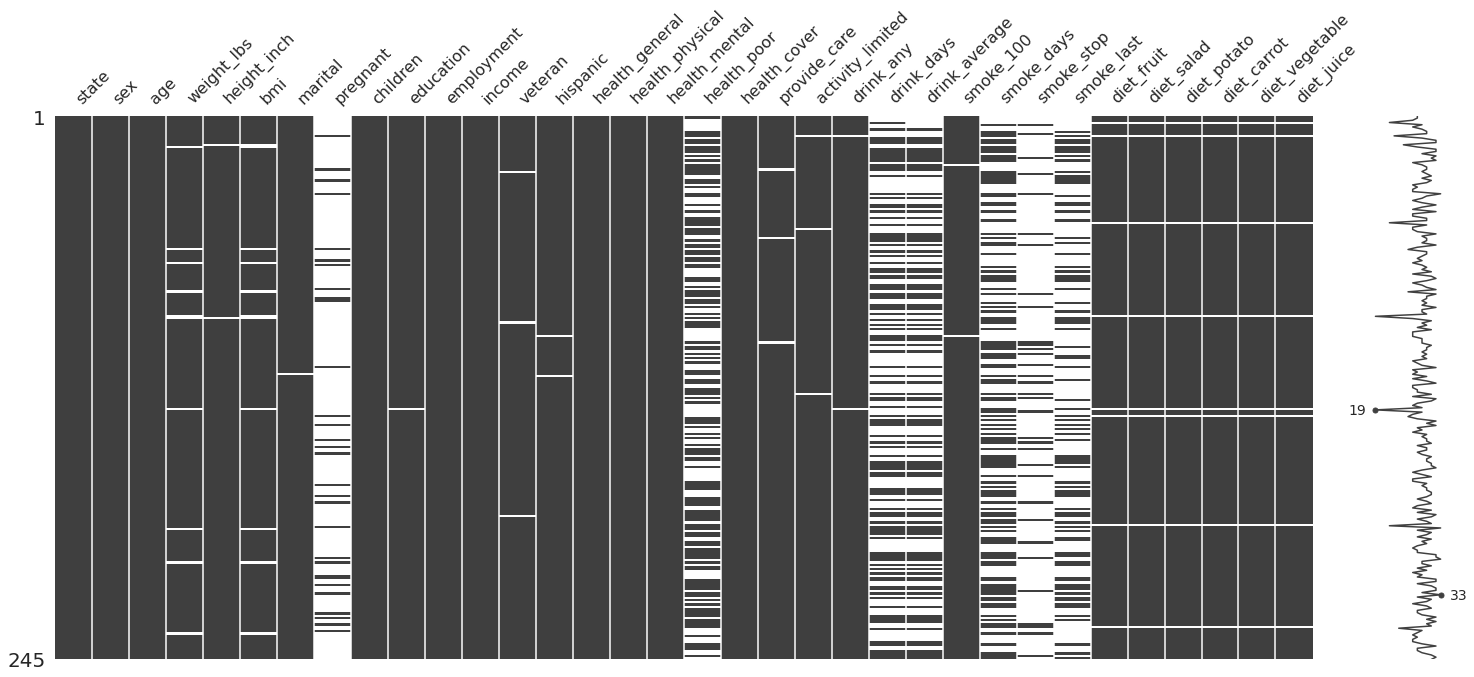

In [35]:
missingno.matrix(df=riskfactors_df)

{'matrix': <AxesSubplot:>,
 'shading': <AxesSubplot:>,
 'totals': <AxesSubplot:>,
 'intersections': <AxesSubplot:ylabel='Intersection size'>}

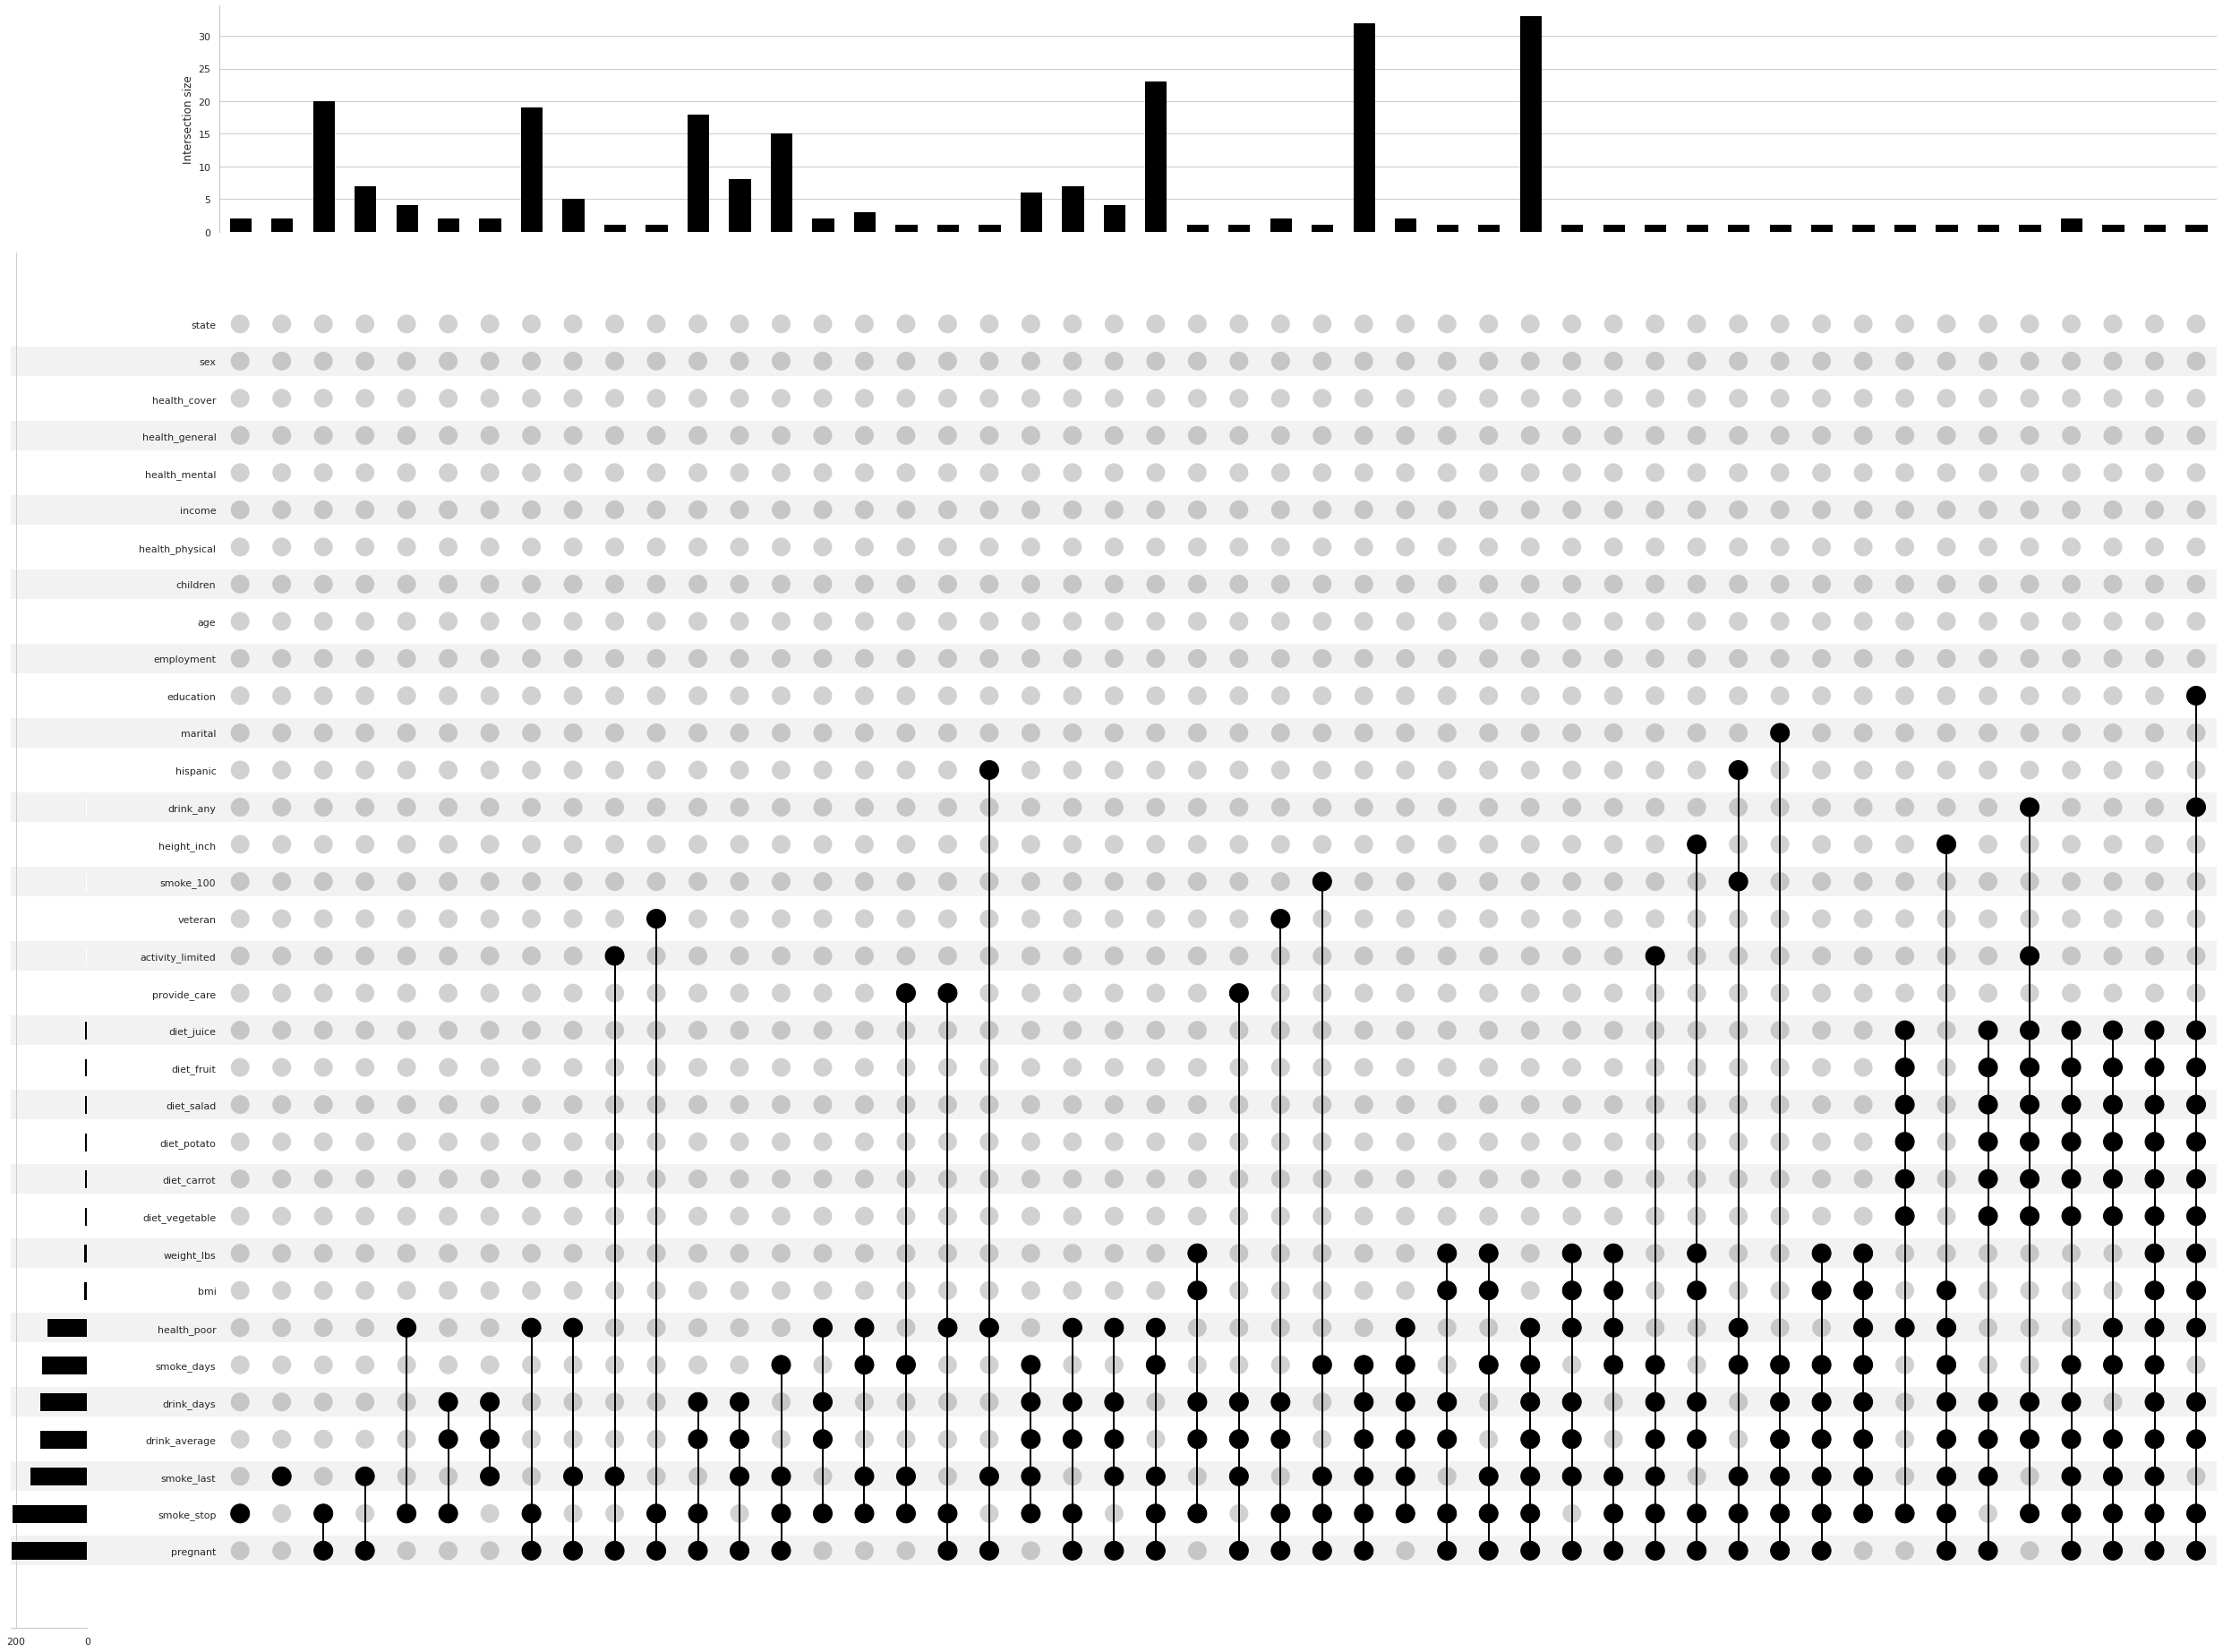

In [36]:
(#muestra los datos perdidos por fila y columna con puntitos en lugr de True/False
    riskfactors_df
    .missing
    .missing_upsetplot(
        variables = None,#no se pasa variable
        element_size = 60
    )
)

## Codificación de valores faltantes

<div class="alert alert-warning", role="alert">
    <b style="font-size: 1.5em;">🚧 Advertencia</b>
    <p>
    Al igual que cada persona es una nueva puerta a un mundo diferente, los <b>valores faltantes</b> existen en diferentes formas y colores. Al trabajar con valores faltantes será crítico entender sus distintas representaciones. A pesar de que el conjunto de datos de trabajo pareciera que no contiene valores faltantes, deberás ser capaz de ir más allá de lo observado a simple vista para remover el manto tras el cual se esconde lo desconocido.
    </p>
</div>

### Valores comúnmente asociados a valores faltantes

#### Cadenas de texto

In [50]:

common_na_strings = ["missing",
    "NA",
    "N A",
    "N/A",
    "#N/A",
    "NA ",
    " NA",
    "N /A",
    "N / A",
    " N / A",
    "N / A ",
    "na",
    "n a",
    "n/a",
    "na ",
    " na",
    "n /a",
    "n / a",
    " a / a",
    "n / a ",
    "NULL",
    "null",
    "",
    "?",
    "*",
    ".",
    'No corresponde']


#### Números

In [51]:
common_na_numbers = (-9, -99, -999, -9999, 9999, 66, 77, 88, -1)

### ¿Cómo encontrar los valores comúnmente asociados a valores faltantes?

In [39]:
missing_data_example_df = pd.DataFrame.from_dict(
    dict(
        x = [1, 3, "NA", -99, -98, -99],
        y = ["A", "N/A", "NA", "E", "F", "G"],
        z = [-100, -99, -98, -101, -1, -1]
    )
)

missing_data_example_df

,x,y,z
0,1,A,-100
1,3,N/A,-99
2,NA,NA,-98
3,-99,E,-101
4,-98,F,-1
5,-99,G,-1


In [40]:
missing_data_example_df.missing.number_missing()

0

#### Revisar tipos de datos

In [41]:
missing_data_example_df.dtypes

x    object
y    object
z     int64
dtype: object

#### Revisar valores únicos de los datos

In [42]:
missing_data_example_df.x.unique()

array([1, 3, 'NA', -99, -98], dtype=object)

In [43]:
(#Selecciona las columnas con el tipo de datos objeto
    missing_data_example_df
    .select_dtypes(object)
    .apply(pd.unique)
)

x     [1, 3, NA, -99, -98]
y    [A, N/A, NA, E, F, G]
dtype: object

### Sustituyendo valores comúnmente asociados a valores faltantes

#### Sustitución desde la lectura de datos

In [52]:
#Se pasa la lista creada de valores nulos, como parametro para detectar los valores nulos al leer el CSV
pd.read_csv(
    './data/pima-indians-diabetes.csv',
    na_filter=True,
    na_values=common_na_strings
    )

,6,148,72,35,0,33.6,0.627,50,1
0,1,85,66,29,0,26.6,0.351,31,0
1,8,183,64,0,0,23.3,0.672,32,1
2,1,89,66,23,94,28.1,0.167,21,0
3,0,137,40,35,168,43.1,2.288,33,1
4,5,116,74,0,0,25.6,0.201,30,0
...,...,...,...,...,...,...,...,...,...
762,10,101,76,48,180,32.9,0.171,63,0
763,2,122,70,27,0,36.8,0.340,27,0
764,5,121,72,23,112,26.2,0.245,30,0
765,1,126,60,0,0,30.1,0.349,47,1


#### Sustitución global

In [47]:
(
    
    riskfactors_df #Aca va el dataframe
    .replace(
        to_replace=common_na_strings, #Se le pasa el filtro de elementos que se tomaran como nulos/na
        value=np.nan #Este esl valor que tomaran todos los elementos que considan con el filtro
    )
)

,state,sex,age,weight_lbs,height_inch,bmi,marital,pregnant,children,education,...,smoke_100,smoke_days,smoke_stop,smoke_last,diet_fruit,diet_salad,diet_potato,diet_carrot,diet_vegetable,diet_juice
0,26,Female,49,190.0,64.0,32.68,Married,NaN,0,6,...,No,NaN,NaN,NaN,1095.0,261.0,104.0,156.0,521.0,12.0
1,40,Female,48,170.0,68.0,25.90,Divorced,NaN,0,5,...,No,NaN,NaN,NaN,52.0,209.0,52.0,0.0,52.0,0.0
2,72,Female,55,163.0,64.0,28.04,Married,NaN,0,4,...,No,NaN,NaN,NaN,36.0,156.0,52.0,24.0,24.0,24.0
3,42,Male,42,230.0,74.0,29.59,Married,NaN,1,6,...,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,32,Female,66,135.0,62.0,24.74,Widowed,NaN,0,5,...,Yes,Everyday,Yes,NaN,-7.0,261.0,209.0,261.0,365.0,104.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
240,10,Female,79,144.0,63.0,25.56,Widowed,NaN,0,4,...,No,NaN,NaN,NaN,-7.0,-7.0,-7.0,-7.0,-7.0,-7.0
241,46,Male,45,170.0,74.0,21.87,Divorced,NaN,2,4,...,No,NaN,NaN,NaN,52.0,52.0,52.0,24.0,52.0,24.0
242,15,Male,62,175.0,71.0,24.46,Divorced,NaN,0,6,...,Yes,Not@All,NaN,7,365.0,156.0,104.0,52.0,730.0,365.0
243,34,Female,62,138.0,64.0,23.74,Married,NaN,0,4,...,Yes,Everyday,No,NaN,730.0,0.0,24.0,156.0,104.0,0.0


<AxesSubplot:>

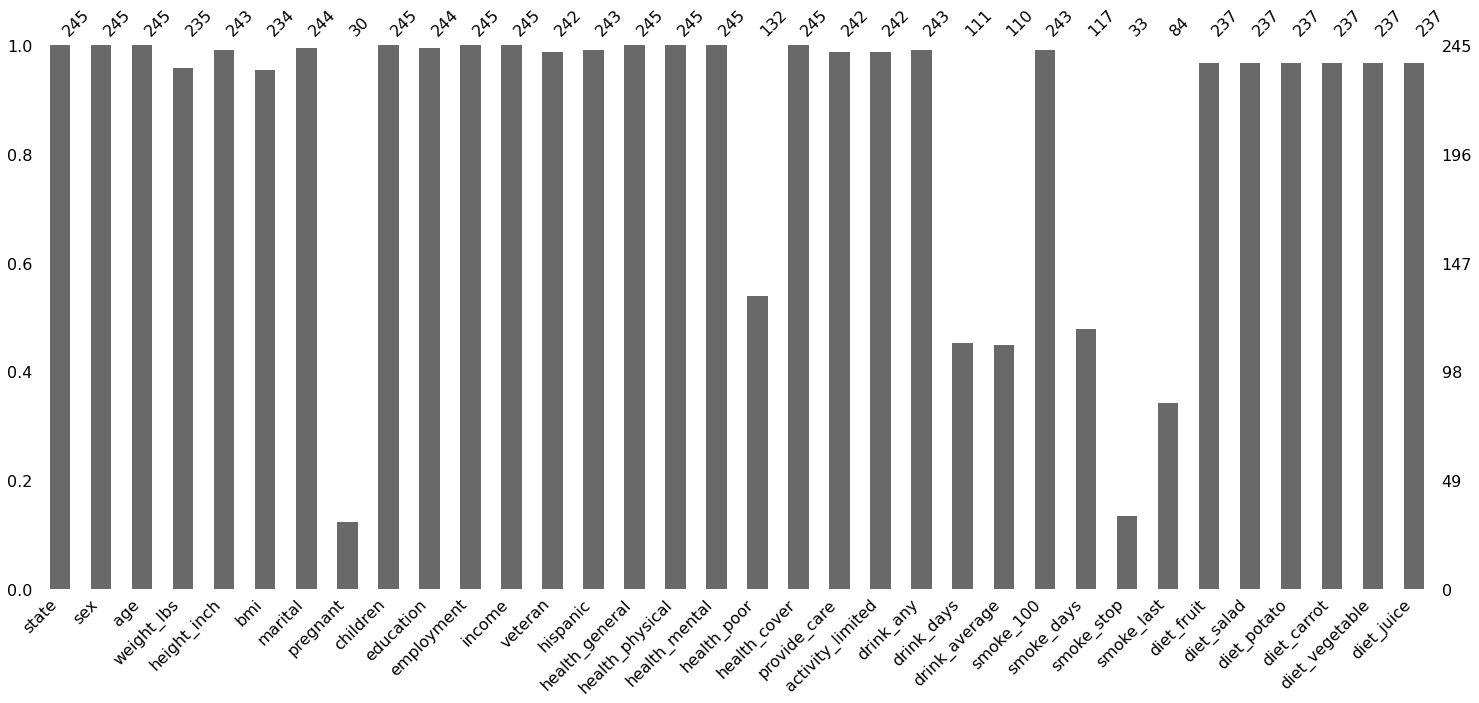

In [20]:
#Se revisa nuevamente grafico de valores faltantes del df
missingno.bar(riskfactors_df)

#### Sustitución dirigida

In [48]:
(#solo efectua el remplao de valores nulos sobre columnas espesificas
    riskfactors_df 
    .replace(
        to_replace={
            #columna a dirigir el remplazo
            "pregnant": {
                #Valores a remplazar por x valor
                'na': np.nan,
                "missing": np.nan,
                "NA": np.nan,
                "N A": np.nan,
                "N/A": np.nan,
                "#N/A": np.nan,
                "NA ": np.nan,
                " NA": np.nan,
                "N /A": np.nan,
                "N / A": np.nan,
                " N / A": np.nan,
                "N / A ": np.nan,
                "na": np.nan,
                "n a": np.nan,
                "n/a": np.nan,
                "na ": np.nan,
                " na": np.nan,
                "n /a": np.nan,
                "n / a": np.nan,
                " a / a": np.nan,
                "n / a ": np.nan,
                "NULL": np.nan,
                "null": np.nan,
                "": np.nan,
                "?": np.nan,
                "*": np.nan,
                ".": np.nan,
            }
        }
    )
)

,state,sex,age,weight_lbs,height_inch,bmi,marital,pregnant,children,education,...,smoke_100,smoke_days,smoke_stop,smoke_last,diet_fruit,diet_salad,diet_potato,diet_carrot,diet_vegetable,diet_juice
0,26,Female,49,190,64,32.68,Married,NaN,0,6,...,No,NaN,NaN,NaN,1095,261,104,156,521,12
1,40,Female,48,170,68,25.90,Divorced,NaN,0,5,...,No,NaN,NaN,NaN,52,209,52,0,52,0
2,72,Female,55,163,64,28.04,Married,NaN,0,4,...,No,NaN,NaN,NaN,36,156,52,24,24,24
3,42,Male,42,230,74,29.59,Married,NaN,1,6,...,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,32,Female,66,135,62,24.74,Widowed,NaN,0,5,...,Yes,Everyday,Yes,NaN,-7,261,209,261,365,104
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
240,10,Female,79,144,63,25.56,Widowed,NaN,0,4,...,No,NaN,NaN,NaN,-7,-7,-7,-7,-7,-7
241,46,Male,45,170,74,21.87,Divorced,NaN,2,4,...,No,NaN,NaN,NaN,52,52,52,24,52,24
242,15,Male,62,175,71,24.46,Divorced,NaN,0,6,...,Yes,Not@All,NaN,7,365,156,104,52,730,365
243,34,Female,62,138,64,23.74,Married,NaN,0,4,...,Yes,Everyday,No,NaN,730,0,24,156,104,0


## Conversión de valores faltantes implícitos a explícitos

<div class="alert alert-warning", role="alert">
    <b style="font-size: 1.5em;">🚧 Advertencia</b>
    <br>
    <br>
    <p>
        <i>
        "<b>Implícito</b> se refiere a todo aquello que se entiende que está incluido
        pero sin ser expresado de forma directa o explícitamente."
        </i>
    </p>
    <p>
    Un <code>valor faltante implícito</code> indica que el valor faltante <b>debería estar incluido</b>
    en el conjunto de datos del análisis, <b>sin que éste lo diga</b> o lo <b>especifique</b>.
    Por lo general, son valores que podemos encontrar al pivotar nuestros datos
    o contabilizar el número de apariciones de combinaciones de las variables de estudio.
    </p>
</div>

In [53]:
implicit_to_explicit_df = pd.DataFrame.from_dict(
    data={
        "name": ["lynn", "lynn", "lynn", "zelda"],
        "time": ["morning", "afternoon", "night", "morning"],
        "value": [350, 310, np.nan, 320]
    }
)

implicit_to_explicit_df

,name,time,value
0,lynn,morning,350.0
1,lynn,afternoon,310.0
2,lynn,night,NaN
3,zelda,morning,320.0


### Estrategias para la identificación de valores faltantes implícitos

<div class="alert alert-info">
    <b style="font-size: 1.5em;">📘 Información</b>
    <p>
       <a href="https://pyjanitor-devs.github.io/pyjanitor/api/functions/#janitor.functions.complete.complete", class="alert-link"><code>janitor.complete()</code></a> está modelada a partir de la función <a href="https://tidyr.tidyverse.org/reference/complete.html", class="alert-link"><code>complete()</code></a> del paquete <a href="https://tidyr.tidyverse.org/index.html", class="alert-link"><code>tidyr</code></a> y es un <i>wrapper</i> alrededor de <a href="https://pyjanitordevs.github.io/pyjanitor/api/functions/#janitor.functions.expand_grid.expand_grid", class="alert-link"><code>janitor.expand_grid()</code></a>, <a href="https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.merge.html", class="alert-link"><code>pd.merge()</code></a> y <a href="https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.merge.html", class="alert-link"><code>pd.fillna()</code></a>. En cierto modo, es lo contrario de <a href="https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.dropna.html", class="alert-link"><code>pd.dropna()</code></a>, ya que expone implícitamente las filas que faltan.
    </p>
    <p>
    Son posibles combinaciones de nombres de columnas o una lista/tupla de nombres de columnas, o incluso un  diccionario de nombres de columna y nuevos valores.
    </p>
    <p>
    Las columnas <a href="https://pandas.pydata.org/docs/user_guide/advanced.html"><code>MultiIndex</code></a> no son complatibles.
    </p>
</div>

#### Limitar la exposición de n-tuplas de valores faltantes

In [53]:
# limitar los datos que quieres mostrar
(
    implicit_to_explicit_df
    .complete( # formato diccionario con as variables y valores a mostrar
        {'name': ['lynn', 'zelda']},
        {'time': ['morning', 'afternoon']},#Si uno de los names anteriores no tenia registro en value quedara como Nan
        sort=True # ordena los valores de manera que primero muestra los pasados y luego el resto
    )
)

,name,time,value
0,lynn,afternoon,310.0
1,lynn,morning,350.0
2,zelda,afternoon,NaN
3,zelda,morning,320.0
4,lynn,night,NaN


#### Rellenar los valores faltantes

In [44]:
(
    implicit_to_explicit_df
    .complete(
        'name',
        'time',
        fill_value= np.nan  # puedes asignar el valor que desees. Por defecto asigna nan
    )
)

,name,time,value
0,lynn,morning,350.0
1,lynn,afternoon,310.0
2,lynn,night,NaN
3,zelda,morning,320.0
4,zelda,afternoon,NaN
5,zelda,night,NaN


#### Limitar el rellenado de valores faltantes implícitos

In [54]:
(
    implicit_to_explicit_df
    # pyjanitor
    .complete(
        "name",
        "time",
        fill_value=0,#valor que remplazara los nan generados al crear los valores faltantes en la columna time
        explicit=False
    )
)

,name,time,value
0,lynn,morning,350.0
1,lynn,afternoon,310.0
2,lynn,night,NaN
3,zelda,morning,320.0
4,zelda,afternoon,0.0
5,zelda,night,0.0


## Tipos de valores faltantes

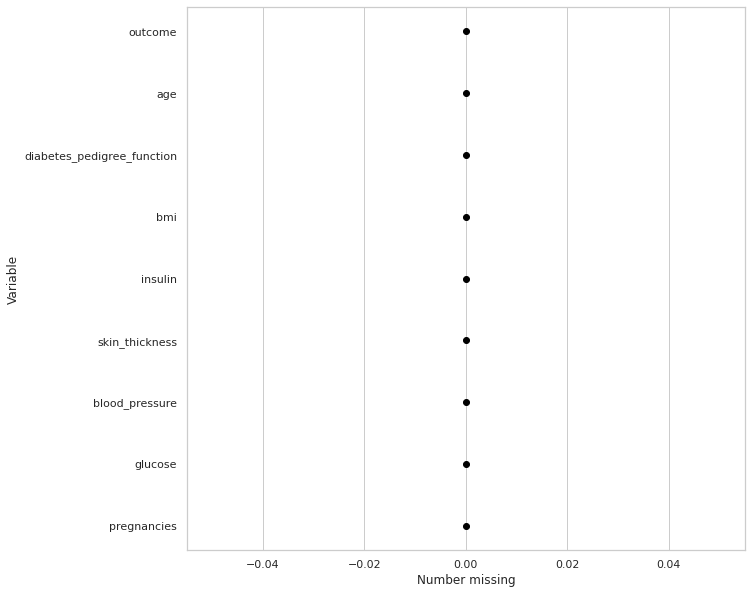

In [55]:
diabetes_df.missing.missing_variable_plot()

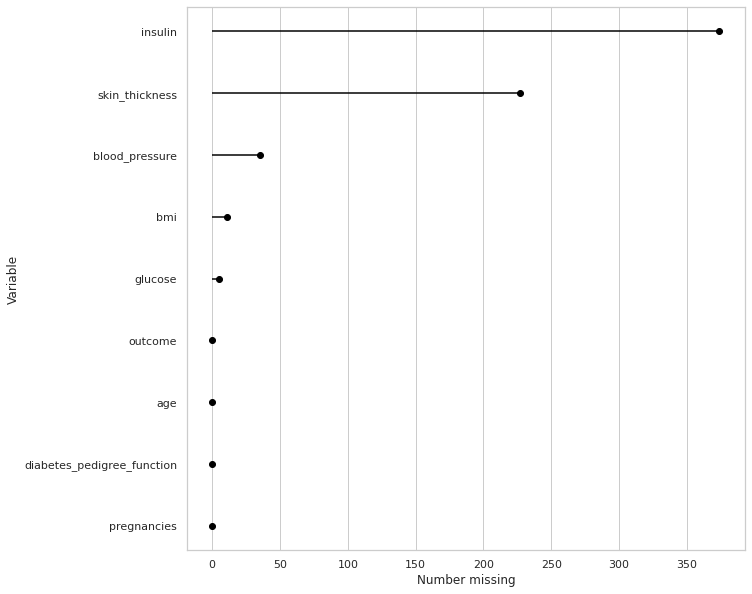

In [56]:
#Remplaza un valor asignado como faltante por otro
diabetes_df[diabetes_df.columns[1:6]] = diabetes_df[diabetes_df.columns[1:6]].replace(0, np.nan)
diabetes_df.missing.missing_variable_plot()

In [45]:

#Por otro lado, sabemos que si existen datos faltantes pero estan escrito en otro formato, en este caso por cero
# Ahora lo que se hace es remplazar tales valores por nan para que sean detectados como valores faltantes.

oceanbuoys_df = oceanbuoys_df.replace(common_na_strings,np.nan)#valores de faltantes de string
oceanbuoys_df = oceanbuoys_df.replace(common_na_numbers,np.nan)#valores faltantes de numeros

<AxesSubplot:>

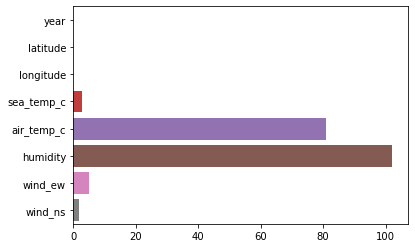

In [50]:
#Grafico de valores nulos (nan) por columna
data = oceanbuoys_df.isnull().sum()
sns.barplot(y=data.index, x=data.values)

### _Missing Completely At Random_ (MCAR)

<AxesSubplot:>

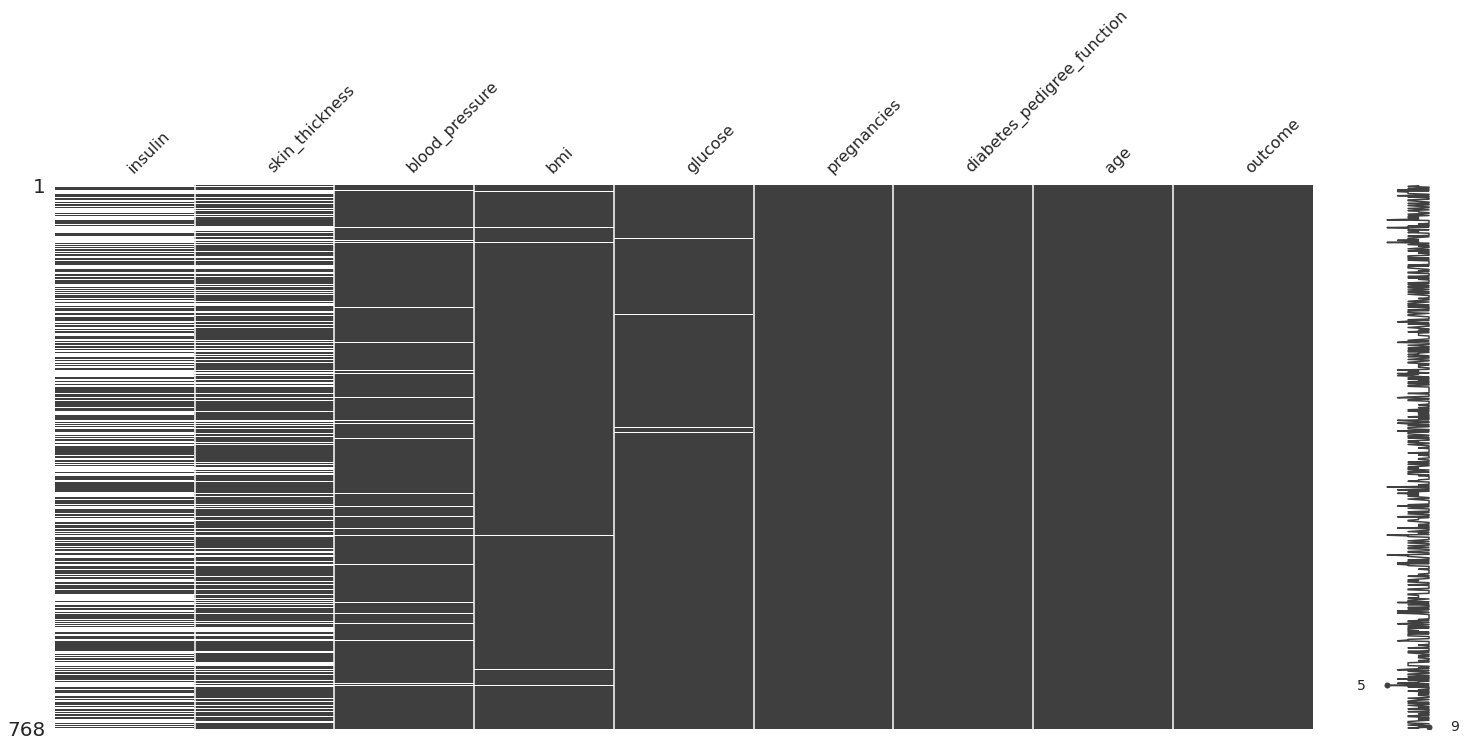

In [57]:
(
    diabetes_df
    .missing.sort_variables_by_missingness()
    .pipe(missingno.matrix)
)

<AxesSubplot:>

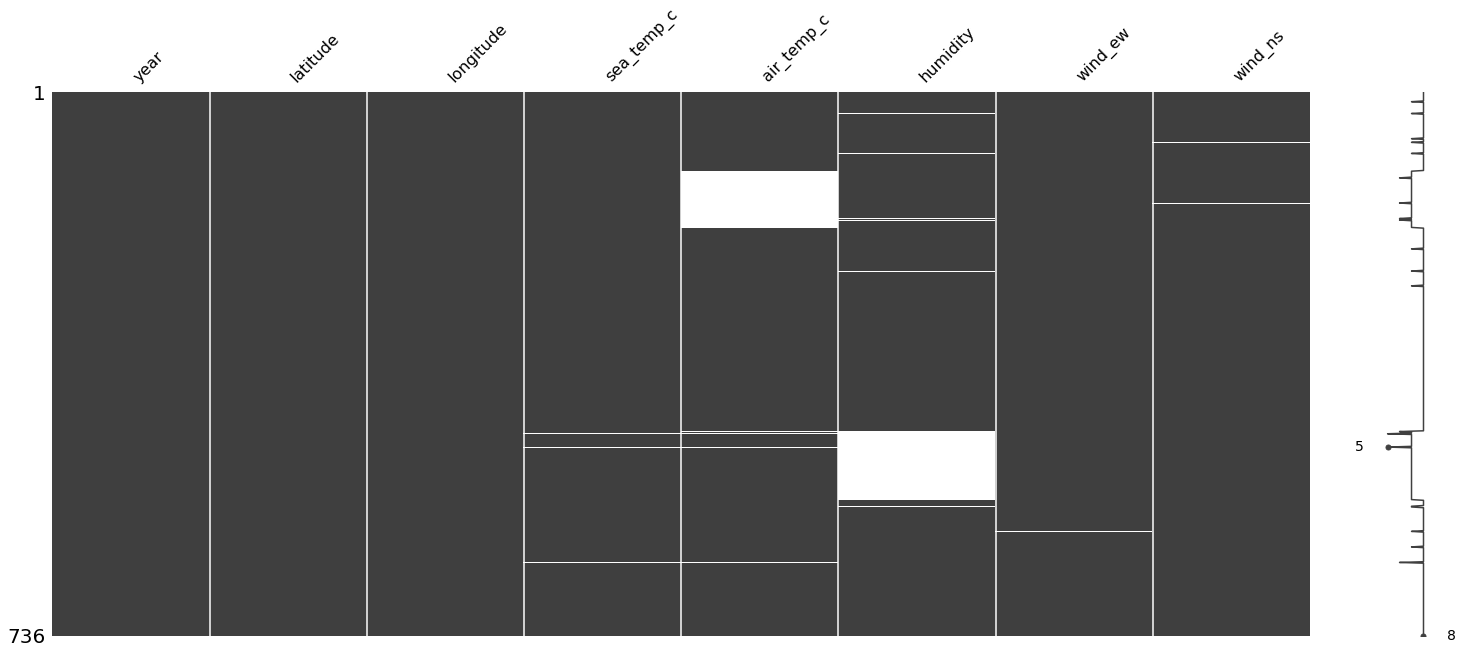

In [52]:
(
    missingno.matrix(oceanbuoys_df)# muestra los datos en una matriz de sombra
)

### _Missing At Random_ (MAR)

<AxesSubplot:>

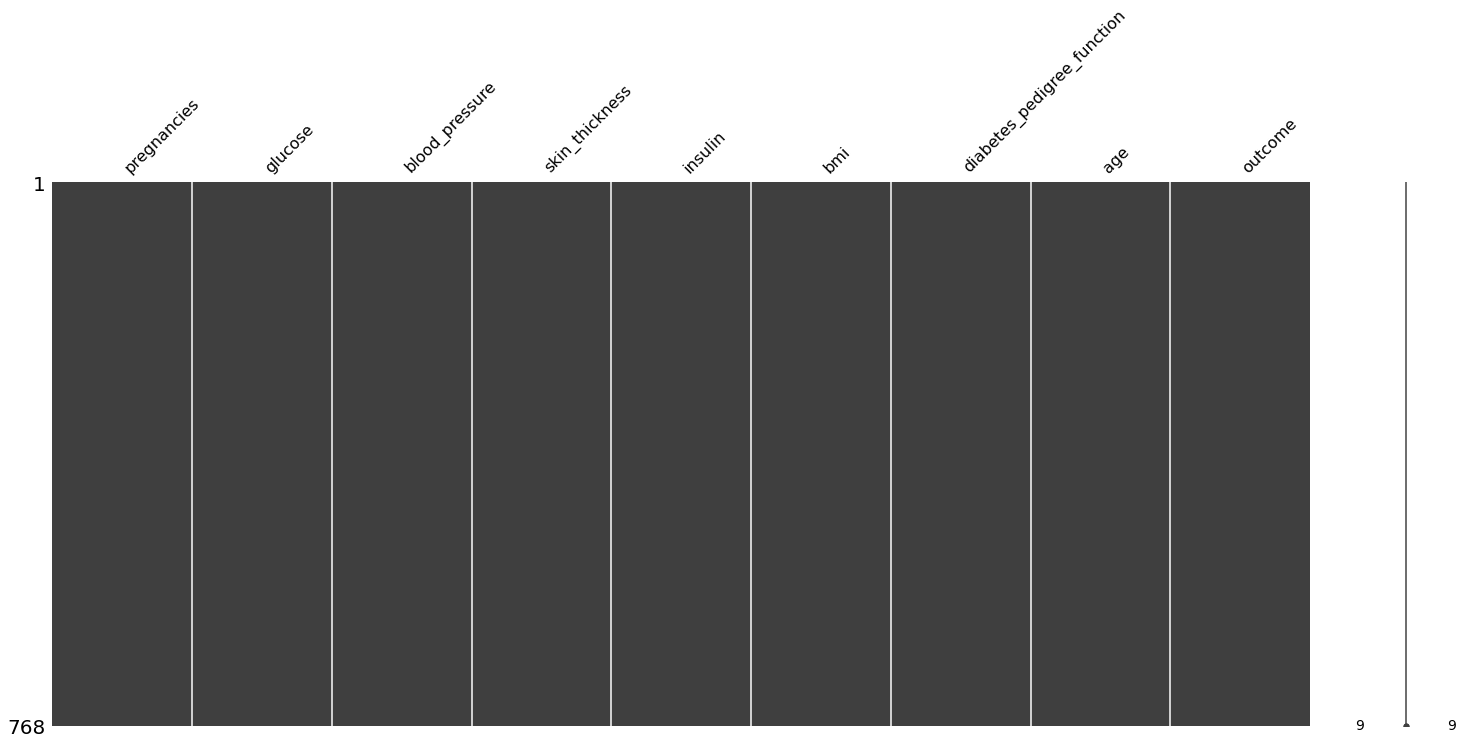

In [56]:
(#ordena visualmente los valores de la columna con mas valores faltantes a la que tiene menos
    diabetes_df
    .missing.sort_variables_by_missingness()
    .sort_values(by = "blood_pressure")
    .pipe(missingno.matrix)
)

### _Missing Not At Random_ (MNAR)

<AxesSubplot:>

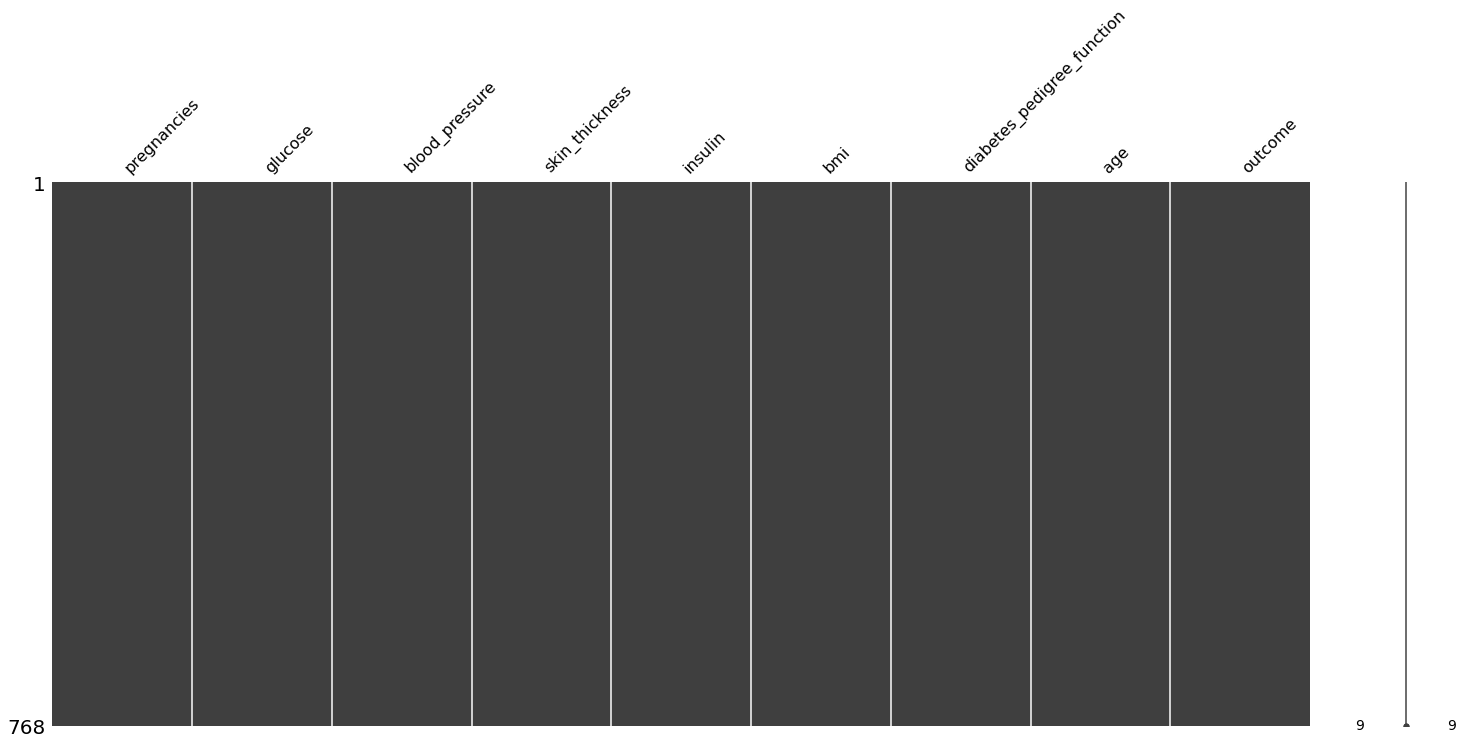

In [57]:
(
    diabetes_df
    .missing.sort_variables_by_missingness()
    .sort_values("insulin")
    .pipe(missingno.matrix)
)

## Concepto y aplicación de la matriz de sombras (_i.e._, _shadow matrix_)

 ### Construcción de la matriz de sombras

In [61]:
(
    riskfactors_df
    .isna() #crea una matriz de booleanos del dataframe
    .replace({ #reemplaza los valores booleanos por valores adecuados
        False:"Not missing",
        True:"Missing"
    })
    .add_suffix("_NA") #agrega un sufijo en cada variable
    # concatena los valores de la matriz de sombra a la derecha del dataframe (columnas con _NA y missing / not missing)
    .pipe(
        lambda shadow_matrix: pd.concat(  
            [riskfactors_df, shadow_matrix],
            axis="columns"
        )
    )
)

,state,sex,age,weight_lbs,height_inch,bmi,marital,pregnant,children,education,...,smoke_100_NA,smoke_days_NA,smoke_stop_NA,smoke_last_NA,diet_fruit_NA,diet_salad_NA,diet_potato_NA,diet_carrot_NA,diet_vegetable_NA,diet_juice_NA
0,26,Female,49,190,64,32.68,Married,NaN,0,6,...,Not missing,Missing,Missing,Missing,Not missing,Not missing,Not missing,Not missing,Not missing,Not missing
1,40,Female,48,170,68,25.90,Divorced,NaN,0,5,...,Not missing,Missing,Missing,Missing,Not missing,Not missing,Not missing,Not missing,Not missing,Not missing
2,72,Female,55,163,64,28.04,Married,NaN,0,4,...,Not missing,Missing,Missing,Missing,Not missing,Not missing,Not missing,Not missing,Not missing,Not missing
3,42,Male,42,230,74,29.59,Married,NaN,1,6,...,Not missing,Missing,Missing,Missing,Missing,Missing,Missing,Missing,Missing,Missing
4,32,Female,66,135,62,24.74,Widowed,NaN,0,5,...,Not missing,Not missing,Not missing,Missing,Not missing,Not missing,Not missing,Not missing,Not missing,Not missing
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
240,10,Female,79,144,63,25.56,Widowed,NaN,0,4,...,Not missing,Missing,Missing,Missing,Not missing,Not missing,Not missing,Not missing,Not missing,Not missing
241,46,Male,45,170,74,21.87,Divorced,NaN,2,4,...,Not missing,Missing,Missing,Missing,Not missing,Not missing,Not missing,Not missing,Not missing,Not missing
242,15,Male,62,175,71,24.46,Divorced,NaN,0,6,...,Not missing,Not missing,Missing,Not missing,Not missing,Not missing,Not missing,Not missing,Not missing,Not missing
243,34,Female,62,138,64,23.74,Married,NaN,0,4,...,Not missing,Not missing,Not missing,Missing,Not missing,Not missing,Not missing,Not missing,Not missing,Not missing


### Utilizar función de utilería `bind_shadow_matrix()`

In [62]:
(
    riskfactors_df.
    missing.
    bind_shadow_matrix(only_missing=True) # con este parametro = True solo se pasaran las variables que tienen valores faltantes
)

,state,sex,age,weight_lbs,height_inch,bmi,marital,pregnant,children,education,...,smoke_100_NA,smoke_days_NA,smoke_stop_NA,smoke_last_NA,diet_fruit_NA,diet_salad_NA,diet_potato_NA,diet_carrot_NA,diet_vegetable_NA,diet_juice_NA
0,26,Female,49,190,64,32.68,Married,NaN,0,6,...,Not Missing,Missing,Missing,Missing,Not Missing,Not Missing,Not Missing,Not Missing,Not Missing,Not Missing
1,40,Female,48,170,68,25.90,Divorced,NaN,0,5,...,Not Missing,Missing,Missing,Missing,Not Missing,Not Missing,Not Missing,Not Missing,Not Missing,Not Missing
2,72,Female,55,163,64,28.04,Married,NaN,0,4,...,Not Missing,Missing,Missing,Missing,Not Missing,Not Missing,Not Missing,Not Missing,Not Missing,Not Missing
3,42,Male,42,230,74,29.59,Married,NaN,1,6,...,Not Missing,Missing,Missing,Missing,Missing,Missing,Missing,Missing,Missing,Missing
4,32,Female,66,135,62,24.74,Widowed,NaN,0,5,...,Not Missing,Not Missing,Not Missing,Missing,Not Missing,Not Missing,Not Missing,Not Missing,Not Missing,Not Missing
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
240,10,Female,79,144,63,25.56,Widowed,NaN,0,4,...,Not Missing,Missing,Missing,Missing,Not Missing,Not Missing,Not Missing,Not Missing,Not Missing,Not Missing
241,46,Male,45,170,74,21.87,Divorced,NaN,2,4,...,Not Missing,Missing,Missing,Missing,Not Missing,Not Missing,Not Missing,Not Missing,Not Missing,Not Missing
242,15,Male,62,175,71,24.46,Divorced,NaN,0,6,...,Not Missing,Not Missing,Missing,Not Missing,Not Missing,Not Missing,Not Missing,Not Missing,Not Missing,Not Missing
243,34,Female,62,138,64,23.74,Married,NaN,0,4,...,Not Missing,Not Missing,Not Missing,Missing,Not Missing,Not Missing,Not Missing,Not Missing,Not Missing,Not Missing


### Explorar estadísticos utilizando las nuevas columnas de la matriz de sombras

In [59]:
# Nos ayuda a encontrar si existe diferencias de alguna variable referente a la ausencia de otra
(
    riskfactors_df
    .missing.bind_shadow_matrix(only_missing=True) #une la matriz de sombra creada
    .groupby(["weight_lbs_NA"]) # agrupar por la ausencia de la variable peso 
    ["age"] # variable age como referencia
    .describe()
    .reset_index()
)

,weight_lbs_NA,count,mean,std,min,25%,50%,75%,max
0,Missing,10.0,60.100000,13.706851,37.0,52.25,62.5,65.0,82.0
1,Not Missing,235.0,58.021277,17.662904,7.0,47.50,59.0,70.0,97.0


## Visualización de valores faltantes en una variable

<AxesSubplot:xlabel='weight_lbs_NA', ylabel='age'>

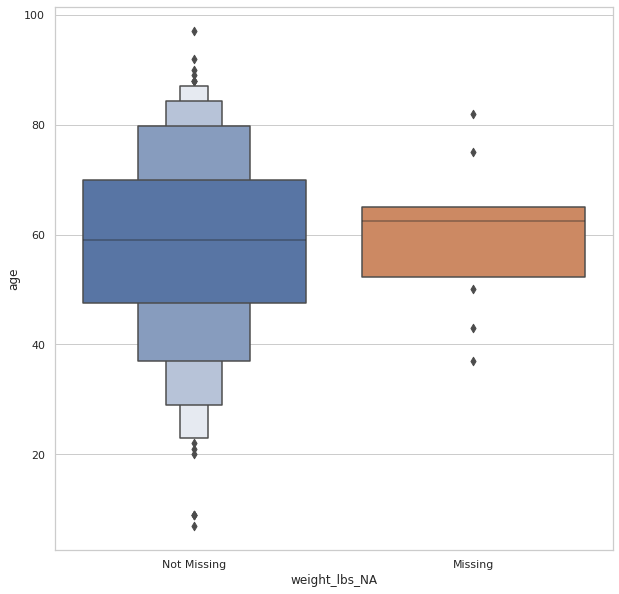

In [64]:
#Comparando los datos faltantes de la variable Peso con los valores de la variable Edad

(
    riskfactors_df
    .missing.bind_shadow_matrix(only_missing=True)
    .pipe(
        lambda df: (
            sns.boxenplot(
                data=df,
                x = 'weight_lbs_NA', #variables con datos faltantes
                y = 'age'  #variable de comparacion
            )
        )
    )
)

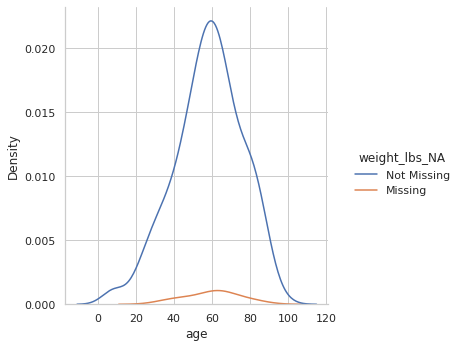

In [65]:
#Visualizacion alternativa mediante funciones de densidad

(
    riskfactors_df
    .missing.bind_shadow_matrix(only_missing=True)
    .pipe(
        lambda df: (
            sns.displot(
                data=df,
                x = 'age', #variable de distribucion
                hue = 'weight_lbs_NA',  #variable de comparacion
                kind= 'kde' #distribucion de densidad (formato del grafico)
            )
        )
    )
)

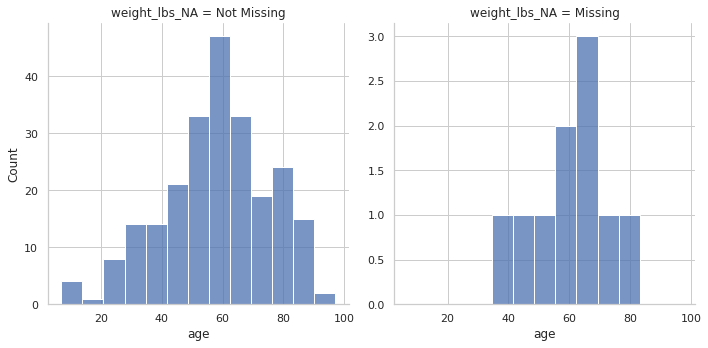

In [67]:
(
    riskfactors_df
    .missing
    .bind_shadow_matrix(only_missing=True)
    .pipe(
        lambda df: (
            sns.displot(
                data=df,
                x="age",
                col="weight_lbs_NA",
                facet_kws={
                    "sharey": False
                }
            )
        )
    )
)

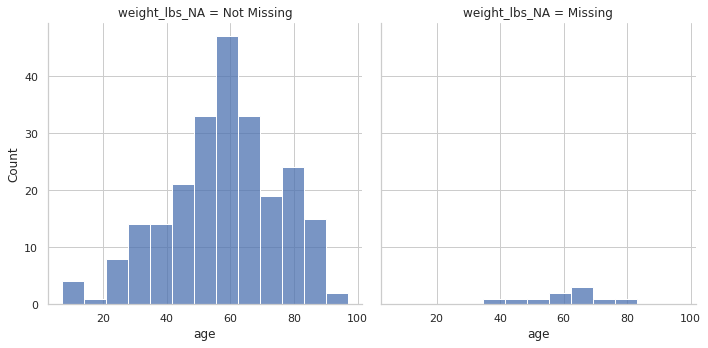

In [66]:
#Visualizacion de la variable Edad y los valores faltantes de la variable Peso mediante histogramas independientes. Este tipo de grafico son muy 
# dificiles de comparar debido a que tenemos mas datos que no faltan de los que faltan

(
    riskfactors_df
    .missing.bind_shadow_matrix(only_missing=True)
    .pipe(
        lambda df: (
            sns.displot(
                data=df,
                x = 'age', #variable de distribucion
                col = 'weight_lbs_NA',  #variable de comparacion
                
            )
        )
    )
)

## Visualización de valores faltantes en dos variables

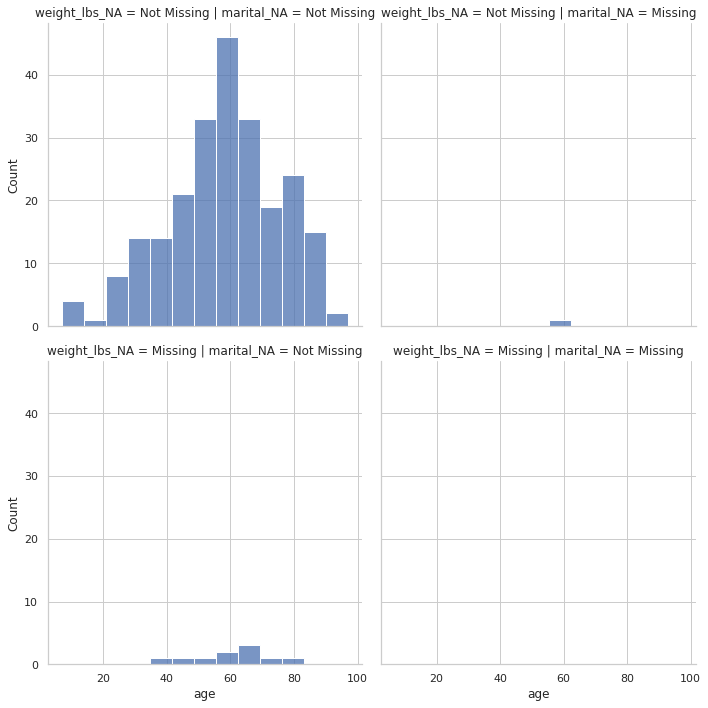

In [50]:
#Grilla de graficos con dos variables de datos faltantes
(
    riskfactors_df
    .missing.bind_shadow_matrix(only_missing=True)
    .pipe(
        lambda df: (
            sns.displot(
                data=df,
                x = 'age', #variable de distribucion
                col = 'marital_NA',  #variable de comparacion
                row = 'weight_lbs_NA'               
            )
        )
    )
)

## Correlación de nulidad

## Visualizacion de valores faltantes en dos variables
Permite visualizar y comparar dos variables cuando a ambas le faltan valores. Un grafico muy util para este tipo de comparaciones son los scatterplot
Para este ejemplo, los puntos azules indican que existe valores tanto para la temperatura como para la humedad. Los puntos rojos indican que solo hay valores para una de las variables y no para la otra. Este tipo de grafica nos ayuda a conocer donde estan agrupados los valores faltantes respecto a otras variables y se grafican fuera de la presencia de los puntos reales para que no introduzcan ruido.

Ademas podemos incluir otro tipo de graficos como los boxplot que nos ayudan a compara la distribucion de los datos de las variables con la distribucion de los datos faltantes y a visualizar si se estan acumulando en un espacio del scatterplot

Este tipo de analisis es importante porque al realizar un EDA sobre los datos faltantes queremos saber si estos siguen una relacion, una tendencia, un comportamiento caracteristico que podamos rellenar segun su variabilidad.

In [68]:
# funcion que añade valores aleatorios a las variables con valores faltantes
# para visualizarlos en un eje
def column_fill_with_dummies(
    column: pd.Series,
    proportion_below: float=0.10, #Proporcion de los datos en la grafica 
    jitter: float=0.075,  # evita el asolapamiento de los puntos en la grafica
    seed: int=42, #semilla para la aleatoriedad
) -> pd.Series: # la funcion retorna una serie

    #Copiar las columnas del dataframe
    column = column.copy(deep=True)

    #Extraer los valores de las variables
    missing_mask = column.isna() # matriz de booleanos
    number_missing_values = missing_mask.sum() #conteo de valores faltantes
    column_range = column.max() - column.min() #rango de las variables

    # shift data
    column_shift = column.min() - column.min() * proportion_below

    # crear un poco de ruido alrededor de los puntos 
    np.random.seed(seed)
    column_jitter = (np.random.rand(number_missing_values) - 2) * column_range * jitter

    #Guardar los nuevos datos aleatorios
    column[missing_mask] = column_shift + column_jitter

    return column

<AxesSubplot:xlabel='weight_lbs', ylabel='height_inch'>

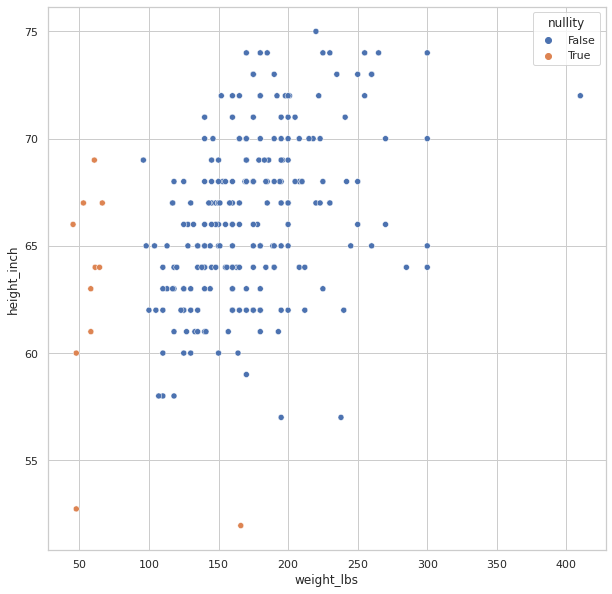

In [69]:
plt.figure(figsize=(10, 10))

(
    riskfactors_df
    .select_dtypes(
        exclude='category'  # excluye las variables categoricas
    )
    .pipe(
        lambda df: df[df.columns[df.isna().any()]] #seleccionar solo columnas que tengan valores faltantes
    )
    .missing.bind_shadow_matrix(true_string = True, false_string = False)
    .apply(
        lambda column: column if '_NA' in column.name else column_fill_with_dummies(column, proportion_below=0.05, jitter=0.075)
    )
    .assign(
        nullity = lambda df: df.weight_lbs_NA | df.height_inch_NA
    )
    .pipe(
        lambda df: (
            sns.scatterplot(
                data = df,
                x='weight_lbs',
                y= 'height_inch',
                hue='nullity'
            )
        )
    )
)

## Correlacion de nulidad

Los valores coloreados de color gris representan que no hay una correlacion ni positiva ni negativa entre las valores faltantes de las variables

Los valores coloreados de azul indican una correlacion positiva, es decir, la presencia de un valor faltante en una de las variables esta correlacionado con un valor faltante en la otra como es el caso de las variables dieta

Los valores coloreados de rojo simboliza una correlacion negativa, es decir, mientras en una de las variables hay un valor faltante en la otro se tiene un valor completo y vicerversa como en el caso de las variables smoke_last y smoke_stop

Hay caso donde te puedes encontrar un simbolo de <1 lo que indica que estas cerca del 100% de correlacion bien sea negativa o positiva dependiendo del color

<AxesSubplot:>

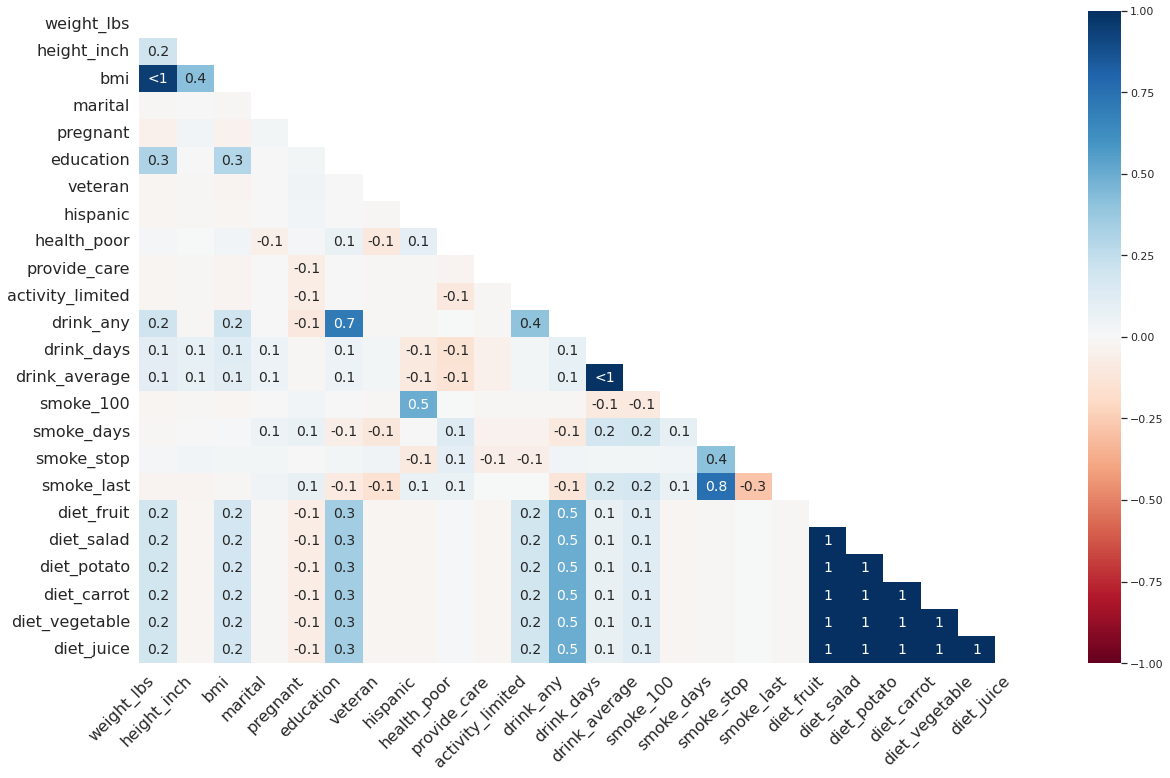

In [65]:
missingno.heatmap(
    df=riskfactors_df
)

Las variables que estan agrupadas cerca del nivel base indican que la presencia de valores faltantes estan muy relacionadas entre si

Mientras mas separado esten las variables en el diagrama es menos probable que los valores faltantes esten correlacionados entre las columnas

<AxesSubplot:>

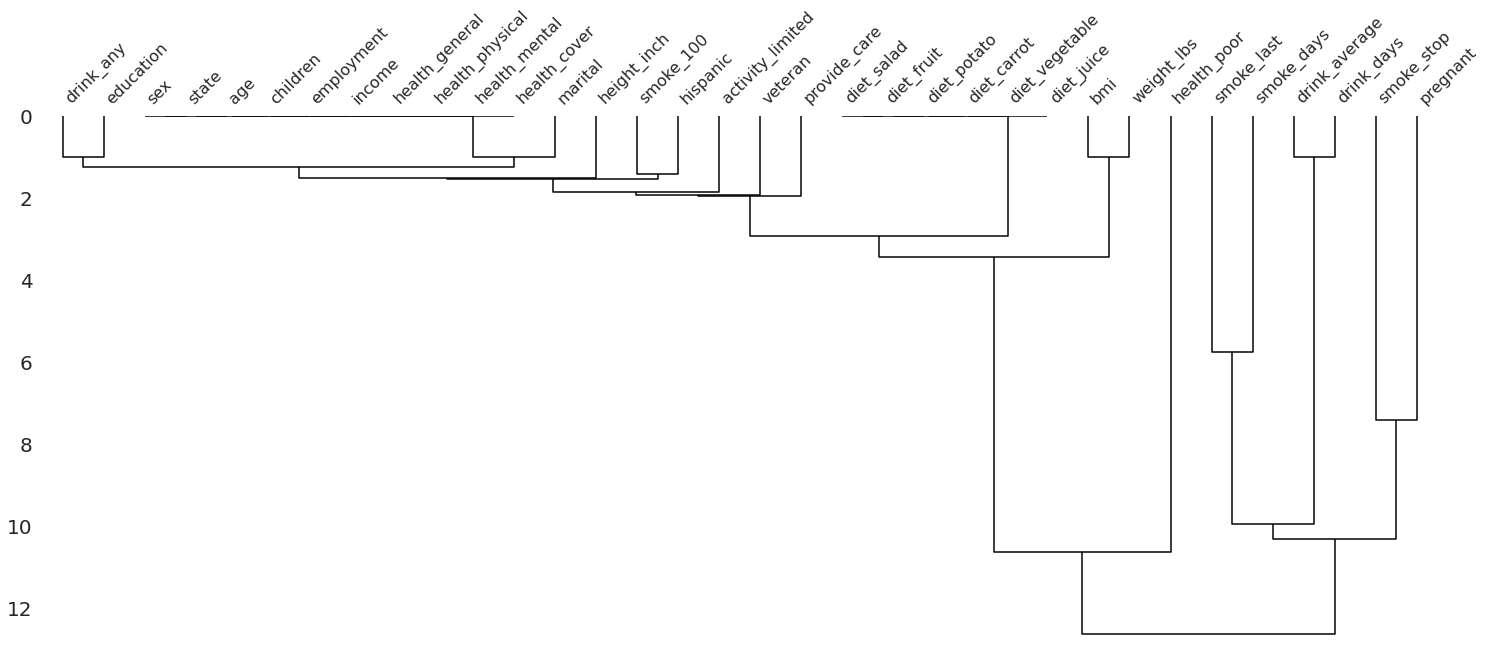

In [66]:
missingno.dendrogram(
    df=riskfactors_df   
)

## Eliminación de valores faltantes

<div class="alert alert-warning", role="alert">
    <b style="font-size: 1.5em;">🚧 Advertencia</b>
    <p>
    Eliminacion de Valores Faltantes
    
Cuando se trata de valores faltantes tenemos dos aproximaciones para el tratamiento de los mismos:

Eliminacion de valores faltantes: La eliminación de valores faltantes asume que los valores faltantes están perdidos completamente al azar (MCAR). En cualquier otro caso, realizar una eliminación de valores faltantes podrá ocasionar sesgos en los análisis y modelos subsecuentes. Por tanto, es importante investigar que mecanismos tienen los datos para asi evitar los sesgos a la hora de eliminarlos

Imputacion de valores faltantes: consiste en añadir valores en los datos faltantes para mantener el registro en el dataset
    </p>
</div>

Primero observa el número total de observaciones y variables que tiene tu conjunto de datos.

### _Pairwise deletion_ (eliminación por pares)

In [ ]:
riskfactors_df.shape, riskfactors_df.size


In [70]:
#Pandas por defecto,ignora los registros con datos faltantes a la hora de hacer algun calculo
(
    riskfactors_df
    .weight_lbs
    .mean()
)

174.26808510638298

In [71]:
riskfactors_df.weight_lbs.size, riskfactors_df.weight_lbs.count()

(245, 235)

In [72]:
riskfactors_df.weight_lbs.mean(skipna=False)

nan

### _Listwise Deletion or Complete Case_ (Eliminación por lista o caso completo)

#### Con base en 1 columna

In [73]:
(
    riskfactors_df
    .dropna(
        subset=['weight_lbs'], # indica la variable donde buscar los valores faltantes
        how='any' # any indica en cualquier registro que aparezca un valor faltante
    )
)

,state,sex,age,weight_lbs,height_inch,bmi,marital,pregnant,children,education,...,smoke_100,smoke_days,smoke_stop,smoke_last,diet_fruit,diet_salad,diet_potato,diet_carrot,diet_vegetable,diet_juice
0,26,Female,49,190,64,32.68,Married,NaN,0,6,...,No,NaN,NaN,NaN,1095,261,104,156,521,12
1,40,Female,48,170,68,25.90,Divorced,NaN,0,5,...,No,NaN,NaN,NaN,52,209,52,0,52,0
2,72,Female,55,163,64,28.04,Married,NaN,0,4,...,No,NaN,NaN,NaN,36,156,52,24,24,24
3,42,Male,42,230,74,29.59,Married,NaN,1,6,...,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,32,Female,66,135,62,24.74,Widowed,NaN,0,5,...,Yes,Everyday,Yes,NaN,-7,261,209,261,365,104
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
240,10,Female,79,144,63,25.56,Widowed,NaN,0,4,...,No,NaN,NaN,NaN,-7,-7,-7,-7,-7,-7
241,46,Male,45,170,74,21.87,Divorced,NaN,2,4,...,No,NaN,NaN,NaN,52,52,52,24,52,24
242,15,Male,62,175,71,24.46,Divorced,NaN,0,6,...,Yes,Not@All,NaN,7,365,156,104,52,730,365
243,34,Female,62,138,64,23.74,Married,NaN,0,4,...,Yes,Everyday,No,NaN,730,0,24,156,104,0


#### Con base en 2 o más columnas

In [74]:
(
    riskfactors_df
    .dropna(
        subset=['weight_lbs', 'height_inch'], # indica el parametro donde buscar los valores faltantes
        how='any' # algoritmo con el que eliminar los registros
    )
    .shape
)

(234, 34)

In [75]:
# elimina los registros en los que hayan valores faltantes en dos variables al mismo tiempo
(
    riskfactors_df
    .dropna(
        subset=['weight_lbs', 'height_inch'], # indica el parametro donde buscar los valores faltantes
        how='all' # all indica los registros donde hayan valores faltantes en ambas variables
    )
    .shape
)


(244, 34)

### Representación gráfica tras la eliminación de los valores faltantes

<AxesSubplot:>

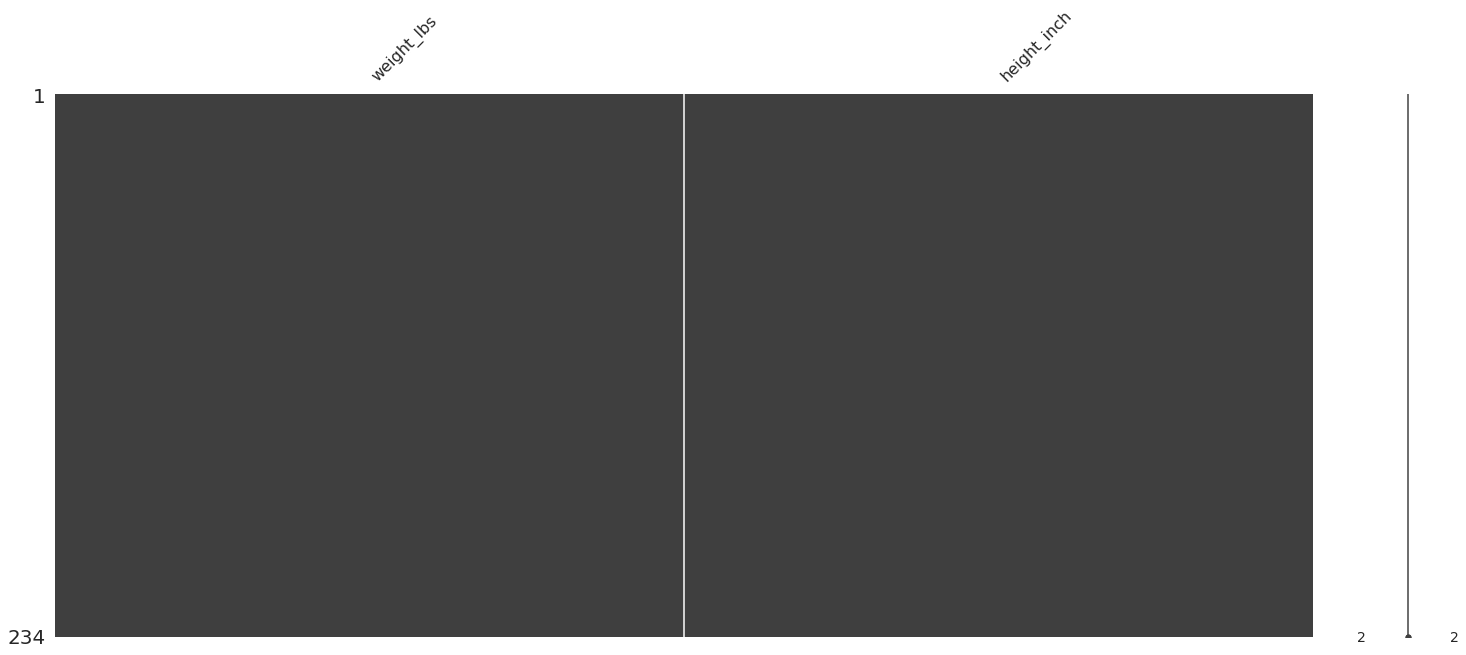

In [76]:
(
    riskfactors_df
    .dropna(
        subset=['weight_lbs', 'height_inch'], # indica el parametro donde buscar los valores faltantes
        how='any'# any indica en cualquier registro que aparezca un valor faltante
    )
    .select_columns(['weight_lbs', 'height_inch'])
    .pipe(missingno.matrix)
)

<AxesSubplot:>

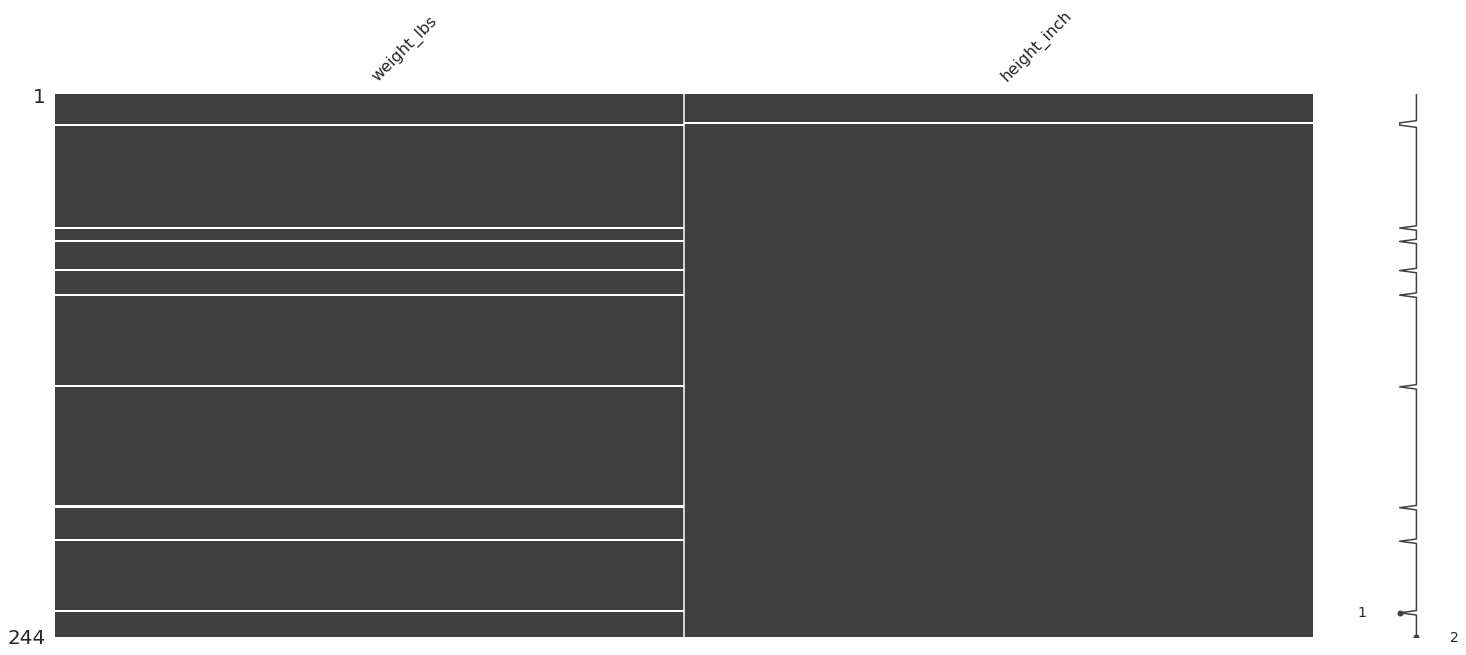

In [77]:
(
    riskfactors_df
    .dropna(
        subset=['weight_lbs', 'height_inch'], # indica el parametro donde buscar los valores faltantes
        how='all' # algoritmo con el que eliminar los registros
    )
    .select_columns(['weight_lbs', 'height_inch'])
    .pipe(missingno.matrix)
)

## Imputación básica de valores faltantes

### Imputación con base en el contexto


5
Imputacion Basica de Datos
Consiste en reemplazar los valores faltantes por algun valor, bien sea estadistico, algun valor por contexto o valores obtenidos mediante un modelo de Machine Learning

In [78]:
implicit_to_explicit_df = pd.DataFrame(
    data={
        "name": ["lynn", np.nan, "zelda", np.nan, "shadowsong", np.nan],
        "time": ["morning", "afternoon", "morning", "afternoon", "morning", "afternoon",],
        "value": [350, 310, 320, 350, 310, 320]
    }
)

implicit_to_explicit_df

,name,time,value
0,lynn,morning,350
1,NaN,afternoon,310
2,zelda,morning,320
3,NaN,afternoon,350
4,shadowsong,morning,310
5,NaN,afternoon,320


In [79]:
implicit_to_explicit_df.ffill() #Rellena los nan con los valores de la celda de arriba

,name,time,value
0,lynn,morning,350
1,lynn,afternoon,310
2,zelda,morning,320
3,zelda,afternoon,350
4,shadowsong,morning,310
5,shadowsong,afternoon,320


### Imputación de un único valor

Se da cuando el contexto no ayuda a completar un valor faltante y por tanto requieres imputar un unico valor con algun estadistico

Para este ejemplo, utilizamos del dataframe riskfactors solo las variables Peso, Altura y bmi. Aplicamos el valor promedio a los valores faltantes de cada columna y al mismo tiempo creamos la shadow matrix para luego graficar

In [80]:
(
    riskfactors_df
    .select_columns('weight_lbs', 'height_inch', 'bmi')
    .missing.bind_shadow_matrix(true_string=True, false_string=False) 
    .apply(
        axis = 'rows',
        func = lambda column: column.fillna(column.mean()) if '_NA' not in column.name else column
    )
)

,weight_lbs,height_inch,bmi,weight_lbs_NA,height_inch_NA,bmi_NA
0,190.0,64.0,32.68,False,False,False
1,170.0,68.0,25.90,False,False,False
2,163.0,64.0,28.04,False,False,False
3,230.0,74.0,29.59,False,False,False
4,135.0,62.0,24.74,False,False,False
...,...,...,...,...,...,...
240,144.0,63.0,25.56,False,False,False
241,170.0,74.0,21.87,False,False,False
242,175.0,71.0,24.46,False,False,False
243,138.0,64.0,23.74,False,False,False


Ahora graficamos los datos con los valores imputados y obtenemos un grafico donde podemos observar que los valores imputados tienen valores que estan en la media de los datos

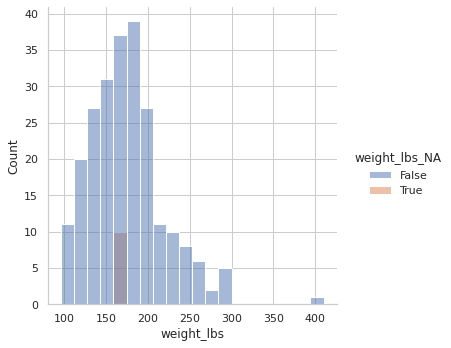

In [81]:
#Grafica de los datos con los valores imputados
(
    riskfactors_df
    .select_columns('weight_lbs', 'height_inch', 'bmi')#columnas seleccionadas de df
    .missing.bind_shadow_matrix(true_string=True, false_string=False) #Parametros pasados al metodo
    .apply(
        axis = 'rows',
        #La función lambda se utiliza para rellenar los valores faltantes en cada columna con el promedio de la columna correspondiente,
        # siempre y cuando la columna no sea una columna de sombra (indicada por la presencia de '_NA'
        func = lambda column: column.fillna(column.mean()) if '_NA' not in column.name else column
    )
    .pipe(
        #El eje x del histograma se establece en la columna 'weight_lbs' y el parámetro hue se establece en 'weight_lbs_NA' para resaltar 
        # los valores faltantes en el histograma
        lambda df: (
            sns.displot(
                data=df,
                x='weight_lbs',
                hue='weight_lbs_NA'
            )
        )
    )
)

<AxesSubplot:xlabel='weight_lbs', ylabel='height_inch'>

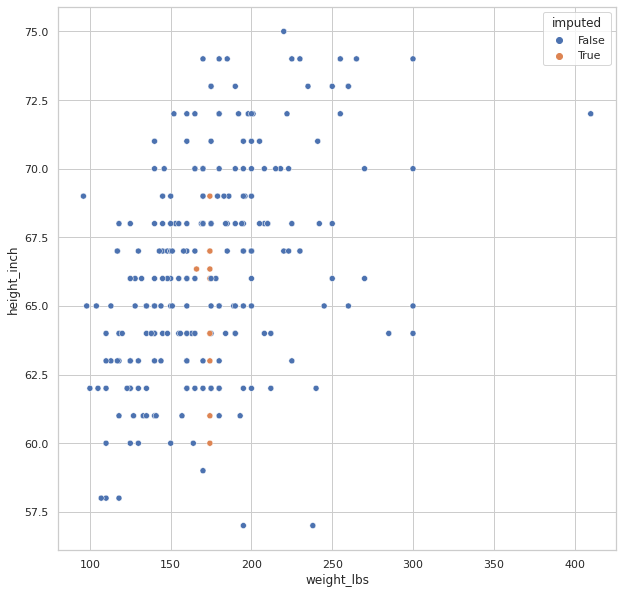

In [77]:
plt.figure(figsize=(10, 10))

(
    riskfactors_df
    .select_columns("weight_lbs", "height_inch", "bmi")
    .missing.bind_shadow_matrix(true_string=True, false_string=False)
    .apply(
        axis="rows",
        func=lambda column: column.fillna(column.mean()) if "_NA" not in column.name else column
    )
    .assign(
        #a columna "imputed" se calcula como el resultado de realizar una operación de OR lógico (|) entre las columnas de sombra correspondientes 
        # a "weight_lbs" y "height_inch". Esto indica si alguno de los valores en ambas columnas es faltante.
        imputed=lambda df: df.weight_lbs_NA | df.height_inch_NA
    )
    .pipe(
        lambda df: (
            #El eje x del gráfico se establece en la columna "weight_lbs", el eje y se establece en la columna "height_inch", y el parámetro hue se 
            # establece en la columna "imputed" para resaltar los puntos en el gráfico donde al menos uno de los valores es faltante.
            sns.scatterplot(
                data=df,
                x="weight_lbs",
                y="height_inch",
                hue="imputed"
            )
        )
    )
)

In [ ]:
plt.figure(figsize=(10, 10))

(
    riskfactors_df
    .select_columns("weight_lbs", "height_inch", "bmi")
    .missing.bind_shadow_matrix(true_string=True, false_string=False)
    .apply(
        axis="rows",
        #los valores vacios son remplazados por la media
        func=lambda column: column.fillna(column.mean())
        if "_NA" not in column.name
        else column,
    )
    #plt.figure(figsize=(10, 10))

(
    riskfactors_df
    .select_columns("weight_lbs", "height_inch", "bmi")
    .missing.bind_shadow_matrix(true_string=True, false_string=False)
    .apply(
        axis="rows",
        #los valores vacios son remplazados por la media
        func=lambda column: column.fillna(column.mean())
        if "_NA" not in column.name
        else column,
    )
    .pivot_longer(
        index="*_NA"
    )
    .pivot_longer(
        index=["variable", 'value'],
        names_to="variable_NA",
        values_to="value_NA"
    )
    .assign(
        valid=lambda df: df.apply(axis="columns", func=lambda column: column.variable in column.variable_NA)
    )
    .query("valid")
    .pipe(
        lambda df: (
            sns.displot(
                data=df,
                x="value",
                hue="value_NA",
                col="variable",
                common_bins=False,
                facet_kws={
                    "sharex": False,
                    "sharey": False
                }
            )
        )
    )
)
plt.figure(figsize=(10, 10))

(
    riskfactors_df
    .select_columns("weight_lbs", "height_inch", "bmi")
    .missing.bind_shadow_matrix(true_string=True, false_string=False)
    .apply(
        axis="rows",
        #los valores vacios son remplazados por la media
        func=lambda column: column.fillna(column.mean())
        if "_NA" not in column.name
        else column,
    )
    .pivot_longer(
        index="*_NA"
    )
    .pivot_longer(
        index=["variable", 'value'],
        names_to="variable_NA",
        values_to="value_NA"
    )
    .assign(
        valid=lambda df: df.apply(axis="columns", func=lambda column: column.variable in column.variable_NA)
    )
    .query("valid")
    .pipe(
        lambda df: (
            sns.displot(
                data=df,
                x="value",
                hue="value_NA",
                col="variable",
                common_bins=False,
                facet_kws={
                    "sharex": False,
                    "sharey": False
                }
            )
        )
    )
)
#Este método reorganiza el DataFrame para convertir las columnas de sombra en filas, manteniendo los valores en una nueva columna llamada "value".
    .pivot_longer(
        index="*_NA"
    )
    #Este método reorganiza el DataFrame nuevamente para convertir las columnas "variable" y "value" en filas, mientras se crea una nueva 
    # columna "variable_NA" para almacenar los nombres de las columnas de sombra y una columna "value_NA" para almacenar los valores de las 
    # columnas de sombra.
    .pivot_longer(
        index=["variable", 'value'],
        names_to="variable_NA",
        values_to="value_NA"
    )
    #Este método crea una nueva columna llamada "valid" en el DataFrame.
    #La columna "valid" se calcula verificando si el valor de la columna "variable" está presente en la columna "variable_NA". 
    #Si es así, se establece en True; de lo contrario, se establece en False.
    .assign(
        valid=lambda df: df.apply(axis="columns", func=lambda column: column.variable in column.variable_NA)
    )
    #Este método filtra el DataFrame para mantener solo las filas donde la columna "valid" es True.
    .query("valid")
    .pipe(
        lambda df: (
            sns.displot(
                data=df,
                #El eje x del histograma se establece en la columna "value", el parámetro hue se establece en la columna "value_NA" para resaltar 
                # los valores faltantes y no faltantes, el parámetro col se establece en la columna  "variable" para generar un histograma separado 
                # para cada variable, y se desactivan los bins comunes 
                x="value",
                hue="value_NA",
                col="variable",
                #(common_bins=False) para tener bins separados para cada histograma
                common_bins=False,
                #facet_kws para desactivar el intercambio de ejes x y y
                facet_kws={
                    "sharex": False,
                    "sharey": False
                }
            )
        )
    )
)


## Continúa aprendiendo sobre el manejo de valores faltantes

<div class="alert alert-success">
    <b style="font-size: 1.5em;">✅ ¡Felicidades por terminar el curso!</b>
    <p>
Has aprendido bastante sobre la exploración y manipulación de valores faltantes.
    </p>
    <p>
Empezaste conociento las principales operaciones al trabajar con valores faltantes. Ahora, eres consciente de que estas operaciones no son universales y cada software decide tratar a los valores faltantes a su conveniencia.
    </p>
    <p>
Y, hablando de conveniencias, comenzaste tu camino en la exploración de valores faltantes a través de una representación universal de qué es lo que faltaba. No obstante, no pasó mucho para darte cuenta de que los valores faltantes pueden existir en formas muy variables. Incluso, en formas en las que no sabemos que nos faltan estos valores en sí mismos. 
    </p>
    <p>
Con los valores faltantes ya expuestos, te conviertes en una persona capaz de explorarlos en profundidad de forma estadística y visual. Entendiendo así, los distintos mecanismos que pueden tener los valores faltantes: MCAR, MAR y MNAR.
    </p>
    <p>
A su vez, aprendiste las bases sobre cómo tratarlos a través de la eliminación de elementos o la imputación de valores de una forma básica y sencilla. Por lo tanto, necesitarás continuar tu camino de aprendizaje con un curso que te permita profundizar en estas técnicas de tratamiento para valores faltantes.
    </p>
    <p>
Te recomiendo continuar con mi <a href="https://platzi.com/cursos/datos-faltantes-imputacion/">Curso de Manejo de Datos Faltantes: Imputación</a>. Estoy seguro de que tus habilidades adquiridas hasta el momento mejorarán, permitiéndote realizar análisis cada vez más complejos y cercanos al mundo real.
    </p>
    <p>
    Con mucha alegría por tu logro,
   Jesús Vélez Santiago
    </p>
    
</div>

## Información de sesión

In [ ]:
session_info.show()

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=694a3d08-7f18-421d-9e2f-c2820a79680e' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>